# Análise Comparativa de Assinaturas Espectrais
Este notebook Python para Google Colab realiza uma análise comparativa detalhada de múltiplas assinaturas espectrais armazenadas em arquivos CSV. Ele abrange desde o carregamento dos dados até a visualização de distâncias espectrais e agrupamento hierárquico.

## 1. Configuração do Ambiente
Importa as bibliotecas necessárias e inclui o código para montar o Google Drive (comentado para execução local, mas essencial no Colab).

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import euclidean, pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from google.colab import drive

# Montar o Google Drive
drive.mount("/content/drive")

Mounted at /content/drive


## 2. Carregamento e Consolidação dos Dados
Define o caminho para a pasta no Google Drive contendo os arquivos CSV, itera sobre eles, extrai o nome da classe e consolida os dados em um único DataFrame.

In [ ]:
# Substitua pelo caminho da sua pasta no Google Drive
drive_path = '/content/drive/MyDrive/GEE_Exports_EMIT_Single'

consolidated_df = pd.DataFrame()

for filename in os.listdir(drive_path):
    if filename.endswith('.csv'):
        filepath = os.path.join(drive_path, filename)
        df = pd.read_csv(filepath)

        # Extrair o nome da classe a partir do nome do arquivo
        # Ex: 'assinaturas_metricas_VegetacaoDegradada.csv' -> 'VegetacaoDegradada'
        class_name = filename.replace('assinaturas_metricas_', '').replace('.csv', '')

        # Extract reflectance columns and wavelength
        reflectance_cols = [col for col in df.columns if col.startswith('reflectance_')]
        wavelength_col = [col for col in df.columns if col == 'wavelength_nm'] # Assuming wavelength is in a column named 'wavelength_nm' or similar. Adjust if needed.

        if not wavelength_col:
            print(f"Wavelength column not found in {filename}. Skipping.")
            continue
        wavelength_col = wavelength_col[0]

        # Use wavelength as index and reflectance values as columns
        if consolidated_df.empty:
            consolidated_df = df.set_index(wavelength_col)[reflectance_cols].T
            consolidated_df.index = [class_name] * len(consolidated_df) # Rename index to class_name
        else:
            temp_df = df.set_index(wavelength_col)[reflectance_cols].T
            temp_df.index = [class_name] * len(temp_df) # Rename index to class_name
            consolidated_df = pd.concat([consolidated_df, temp_df])


consolidated_df = consolidated_df.T.sort_index() # Transpose back and sort by wavelength
print("Dados consolidados:")
print(consolidated_df.head())

Wavelength column not found in assinaturas_pontos_Solar.csv. Skipping.
Wavelength column not found in assinaturas_pontos_Brejos de Altitude.csv. Skipping.
Wavelength column not found in assinaturas_pontos_Culturas de Caju.csv. Skipping.
Wavelength column not found in assinaturas_pontos_VegetacaoDegradada.csv. Skipping.
Wavelength column not found in assinaturas_pontos_Coqueirais.csv. Skipping.
Wavelength column not found in assinaturas_pontos_caatinga.csv. Skipping.
Wavelength column not found in assinaturas_pontos_Cerrados Interiores.csv. Skipping.
Wavelength column not found in assinaturas_pontos_solo.csv. Skipping.
Wavelength column not found in assinaturas_pontos_carnaubal (1).csv. Skipping.
Wavelength column not found in assinaturas_pontos_carnaubal.csv. Skipping.
Dados consolidados:
Empty DataFrame
Columns: []
Index: [381.0055847167969, 388.4092102050781, 395.8158264160156, 403.2254028320313, 410.6380004882813]


## 3. Visualização das Assinaturas Espectrais
Gera um gráfico de linhas mostrando todas as assinaturas espectrais em um único eixo, com legendas e rótulos claros.

## 4. Cálculo das Distâncias Espectrais
Implementa a função para o cálculo do Spectral Angle Mapper (SAM) e calcula as matrizes de distância Euclidiana e SAM entre todas as assinaturas.

## 5. Visualização das Matrizes de Distância
Gera heatmaps para as matrizes de distância Euclidiana e SAM, visualizando a dissimilaridade entre as classes.

## 6. Análise de Agrupamento Hierárquico
Realiza o agrupamento hierárquico usando a matriz de distância SAM e plota um dendrograma para visualizar os agrupamentos.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivos encontrados para análise: ['assinaturas_pontos_Solar.csv', 'assinaturas_pontos_Brejos de Altitude.csv', 'assinaturas_pontos_Culturas de Caju.csv', 'assinaturas_pontos_VegetacaoDegradada.csv', 'assinaturas_pontos_Coqueirais.csv', 'assinaturas_pontos_caatinga.csv', 'assinaturas_pontos_Cerrados Interiores.csv', 'assinaturas_pontos_solo.csv', 'assinaturas_pontos_carnaubal (1).csv', 'assinaturas_pontos_carnaubal.csv']\n
--- Processando a classe: Solar ---
Dados carregados. Amostras: 28, Bandas: 570


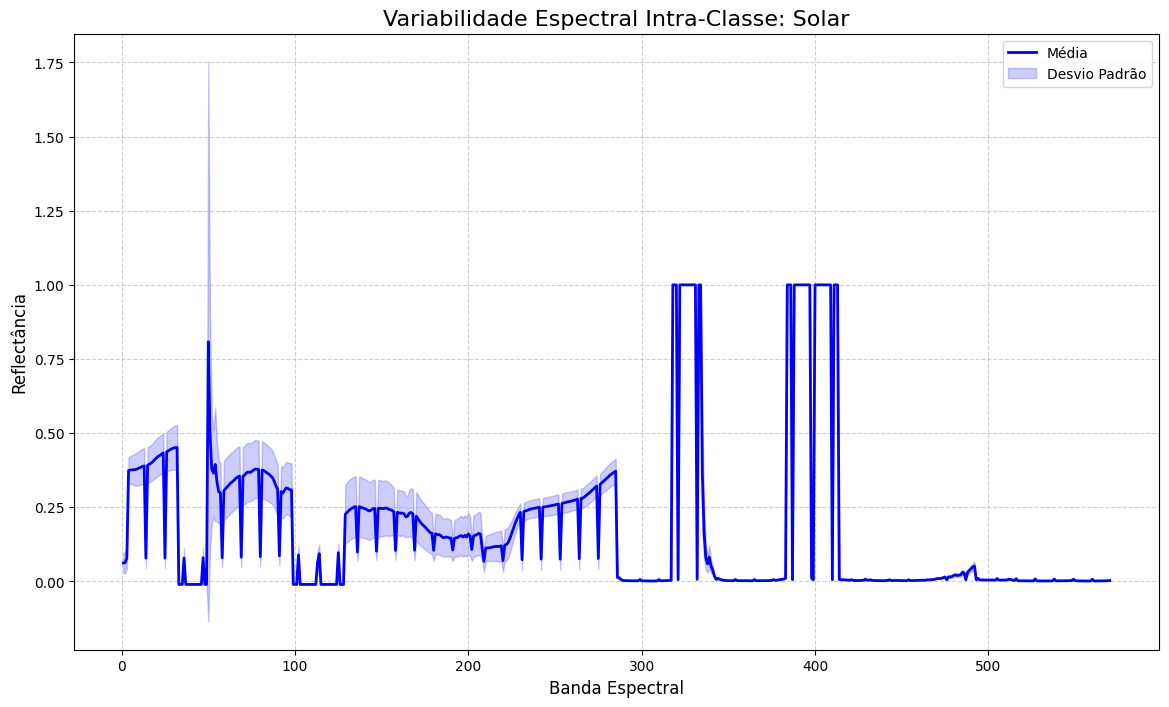

\nEstatísticas Descritivas da Distância SAM para a classe Solar (radianos):
|       |            0 |
|:------|-------------:|
| count | 378          |
| mean  |   0.226093   |
| std   |   0.122076   |
| min   |   0.00780614 |
| 25%   |   0.121641   |
| 50%   |   0.225432   |
| 75%   |   0.298277   |
| max   |   0.535596   |


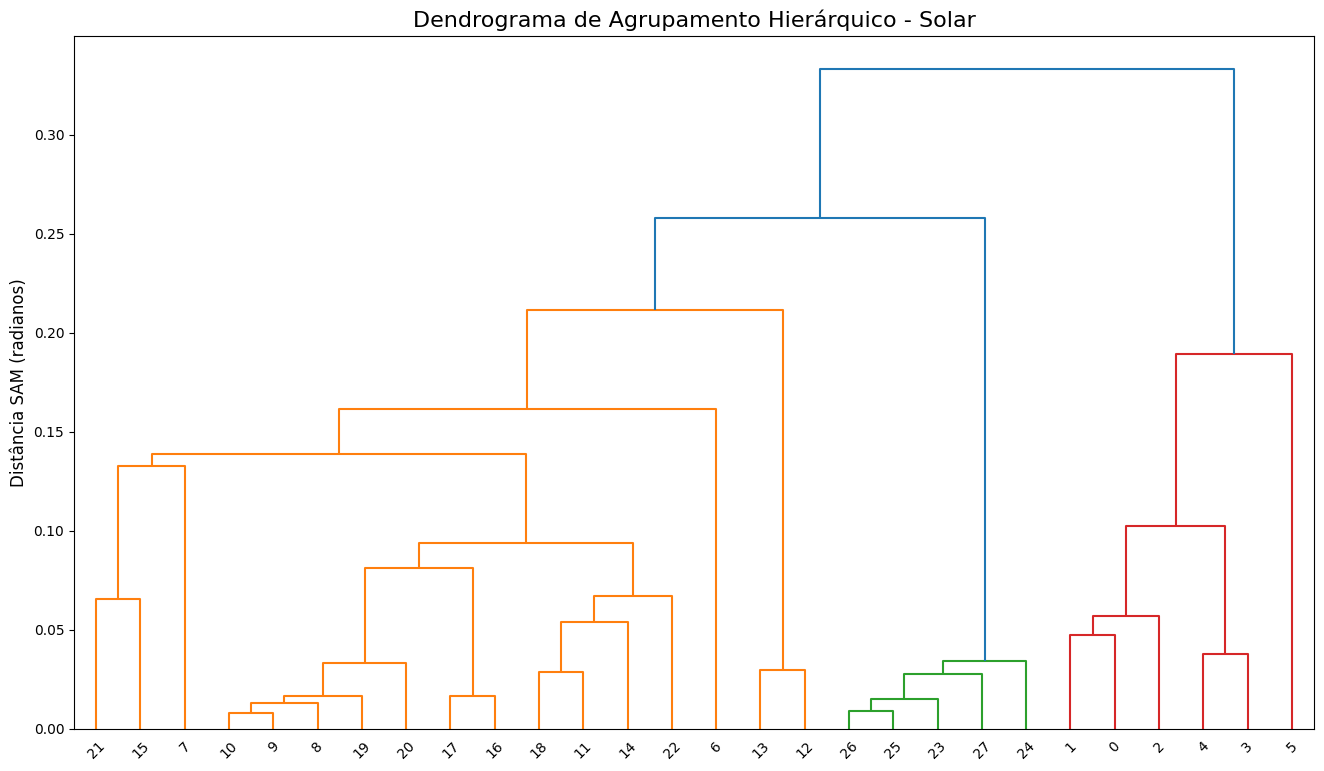

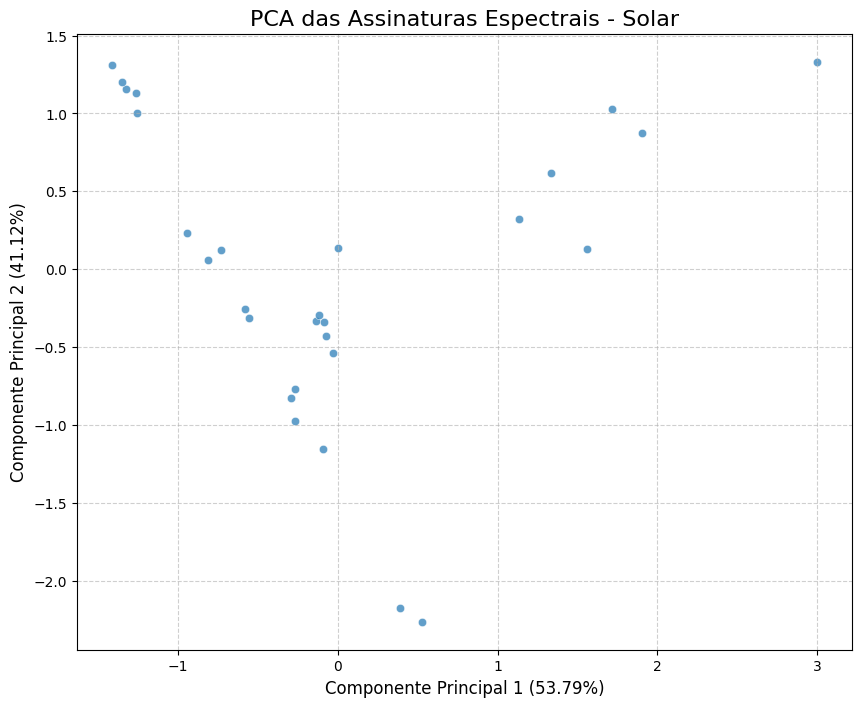

--- Análise para a classe Solar concluída. Resultados salvos em '/content/drive/MyDrive/GEE_Exports_EMIT_Single/resultados_analise_intra_classe'. ---\n================================================================================\n
--- Processando a classe: Brejos de Altitude ---
Dados carregados. Amostras: 39, Bandas: 570


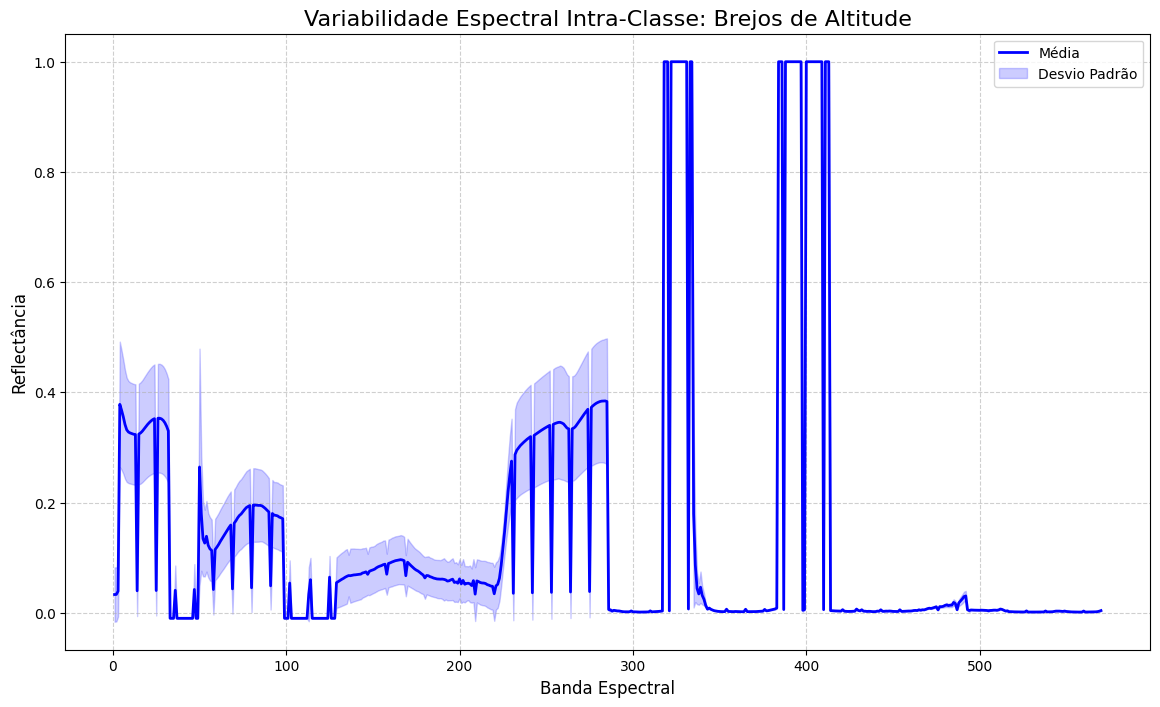

\nEstatísticas Descritivas da Distância SAM para a classe Brejos de Altitude (radianos):
|       |            0 |
|:------|-------------:|
| count | 741          |
| mean  |   0.181797   |
| std   |   0.0918799  |
| min   |   0.00469647 |
| 25%   |   0.11474    |
| 50%   |   0.173087   |
| 75%   |   0.240821   |
| max   |   0.495567   |


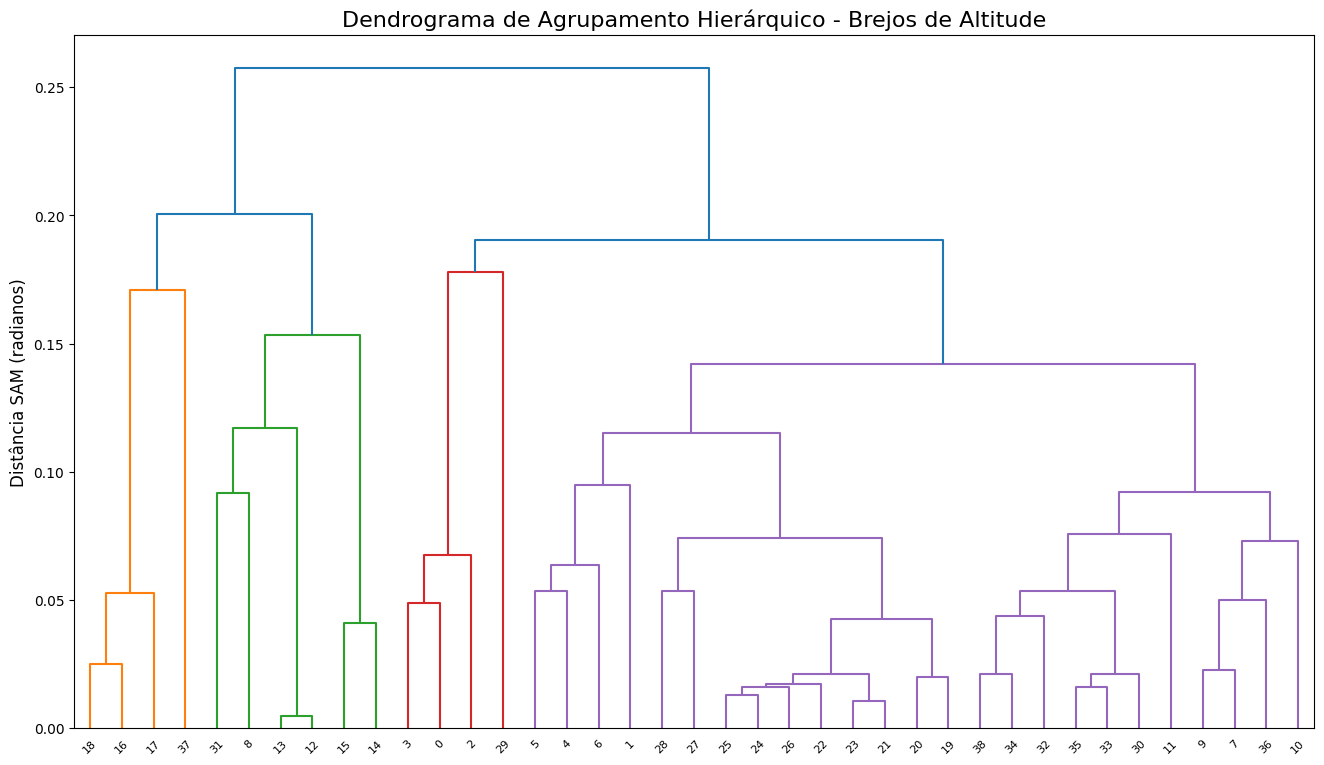

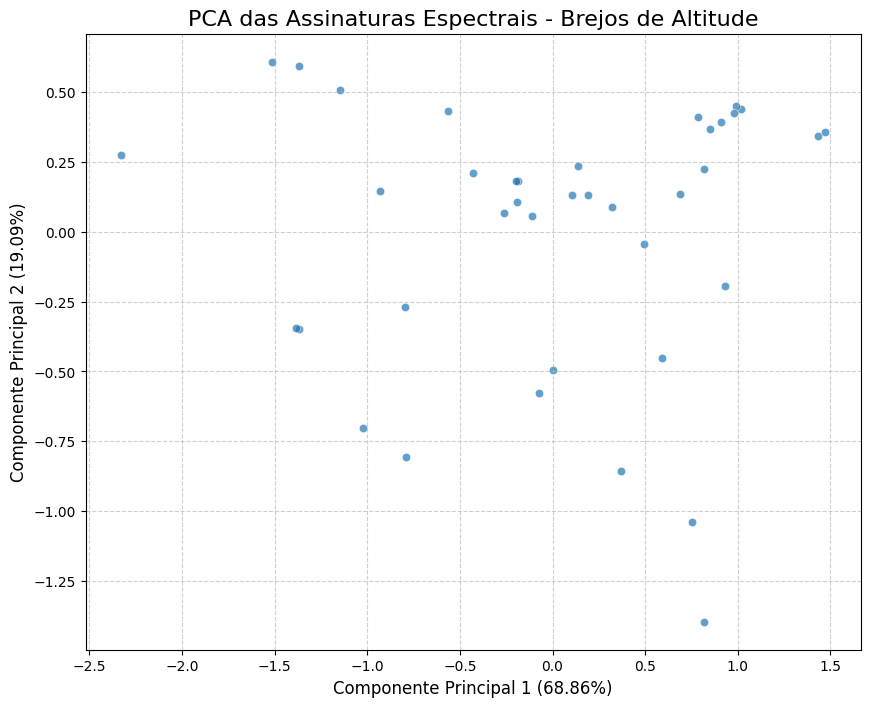

--- Análise para a classe Brejos de Altitude concluída. Resultados salvos em '/content/drive/MyDrive/GEE_Exports_EMIT_Single/resultados_analise_intra_classe'. ---\n================================================================================\n
--- Processando a classe: Culturas de Caju ---
Dados carregados. Amostras: 10, Bandas: 570


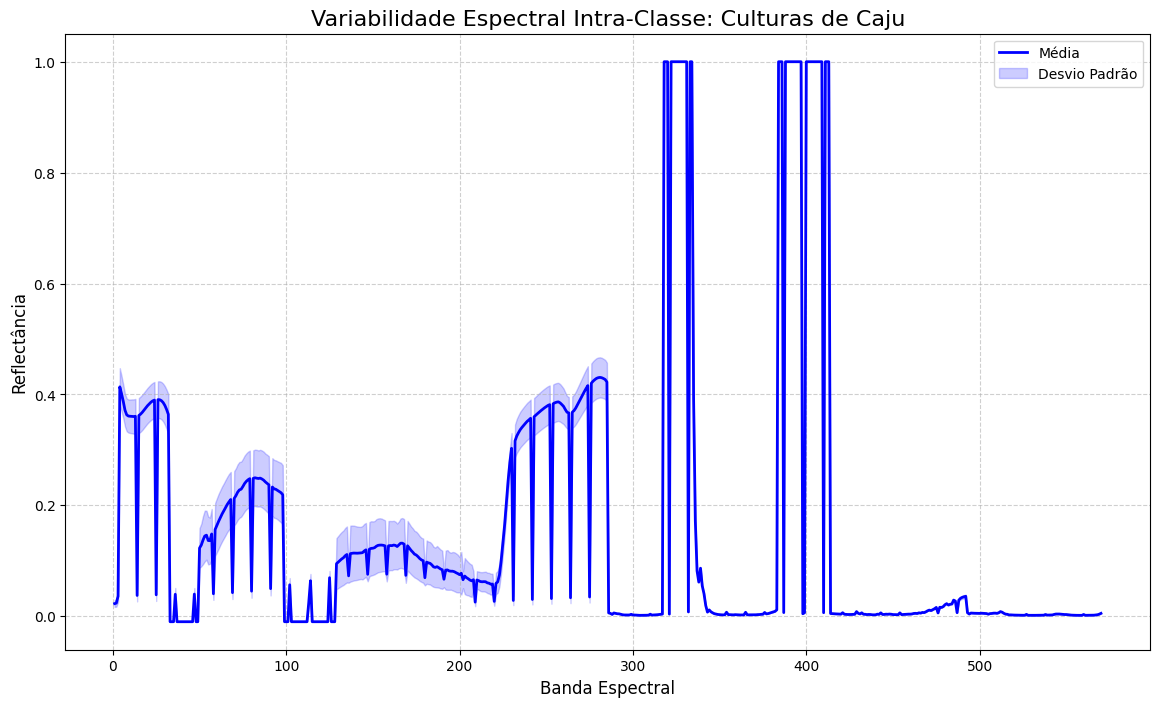

\nEstatísticas Descritivas da Distância SAM para a classe Culturas de Caju (radianos):
|       |          0 |
|:------|-----------:|
| count | 45         |
| mean  |  0.0903614 |
| std   |  0.0508051 |
| min   |  0.0126349 |
| 25%   |  0.0554934 |
| 50%   |  0.0726282 |
| 75%   |  0.113975  |
| max   |  0.222922  |


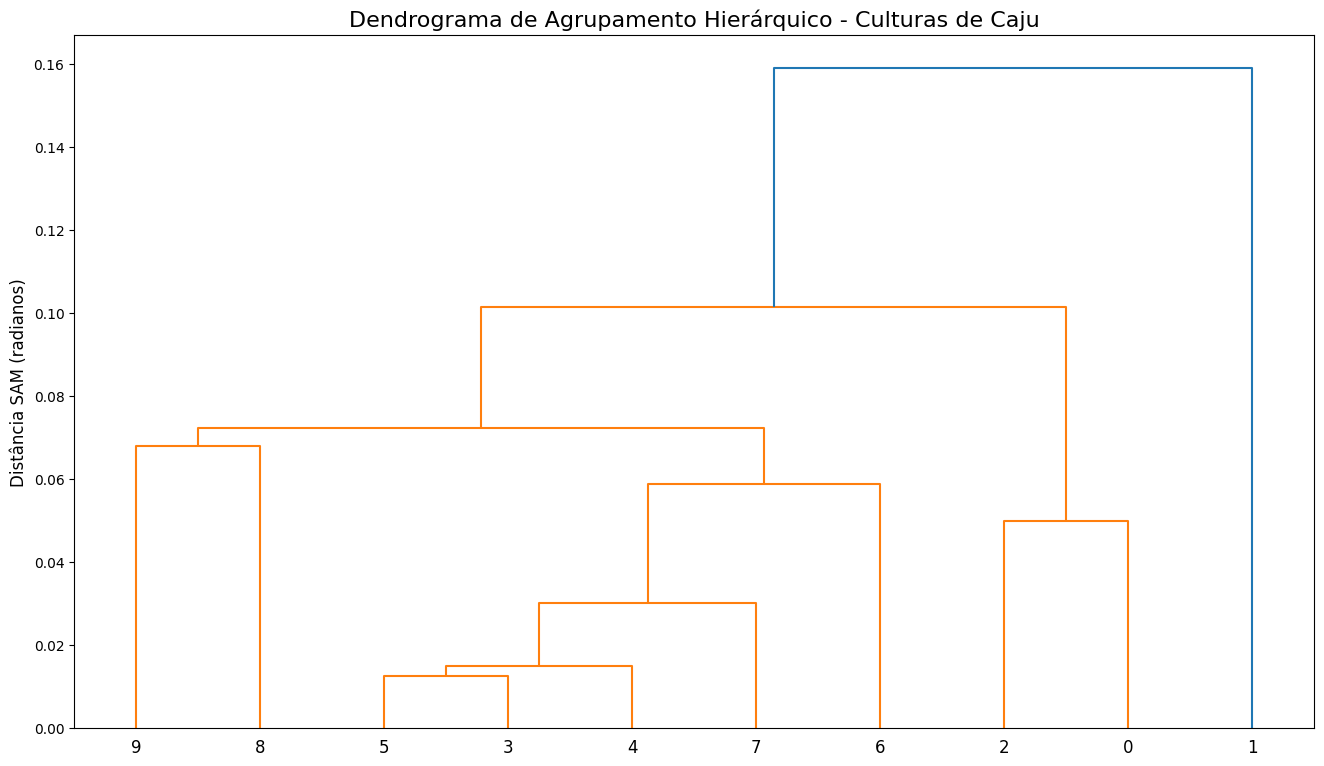

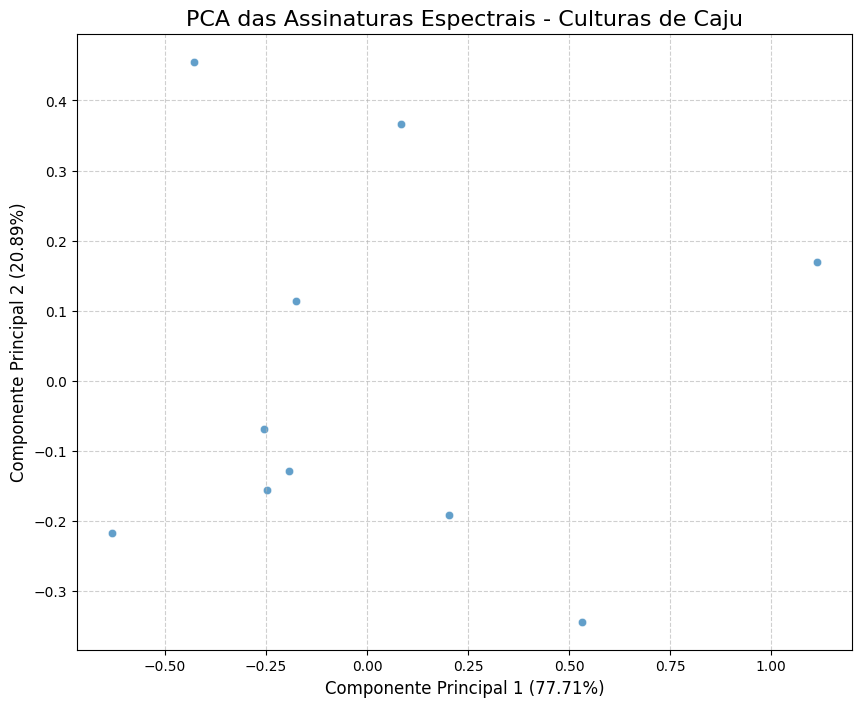

--- Análise para a classe Culturas de Caju concluída. Resultados salvos em '/content/drive/MyDrive/GEE_Exports_EMIT_Single/resultados_analise_intra_classe'. ---\n================================================================================\n
--- Processando a classe: VegetacaoDegradada ---
Dados carregados. Amostras: 11, Bandas: 570


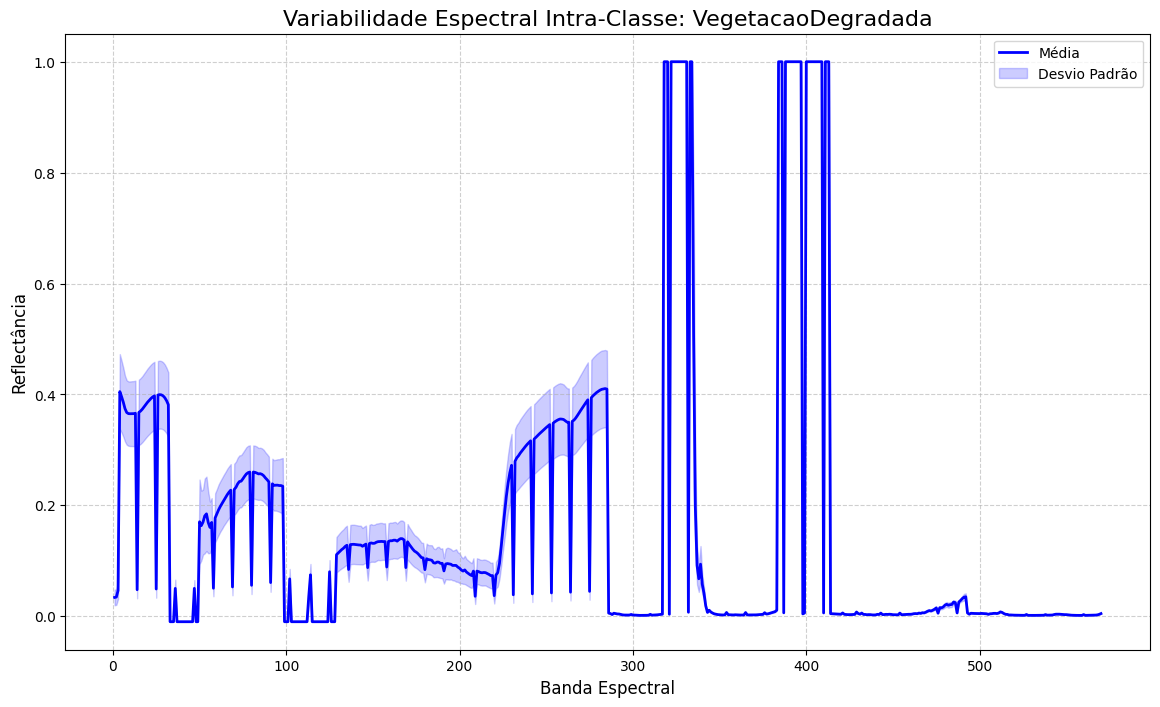

\nEstatísticas Descritivas da Distância SAM para a classe VegetacaoDegradada (radianos):
|       |          0 |
|:------|-----------:|
| count | 55         |
| mean  |  0.12064   |
| std   |  0.0547005 |
| min   |  0.0133225 |
| 25%   |  0.0873137 |
| 50%   |  0.130396  |
| 75%   |  0.159582  |
| max   |  0.228484  |


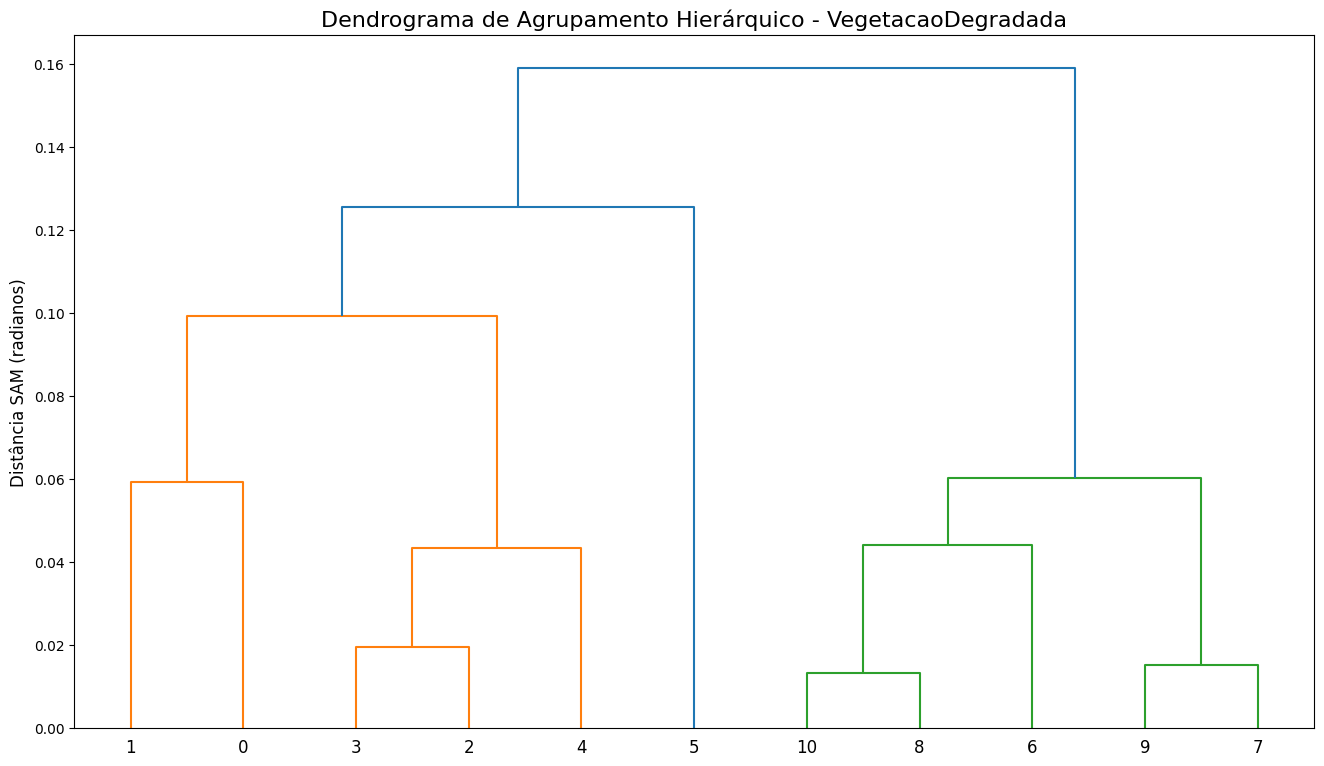

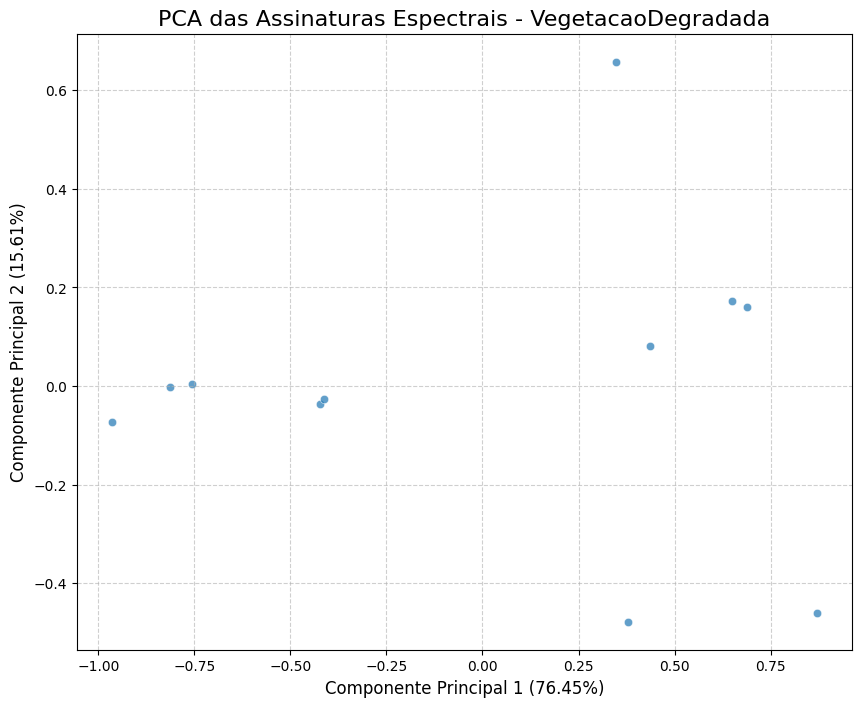

--- Análise para a classe VegetacaoDegradada concluída. Resultados salvos em '/content/drive/MyDrive/GEE_Exports_EMIT_Single/resultados_analise_intra_classe'. ---\n================================================================================\n
--- Processando a classe: Coqueirais ---
Dados carregados. Amostras: 29, Bandas: 570


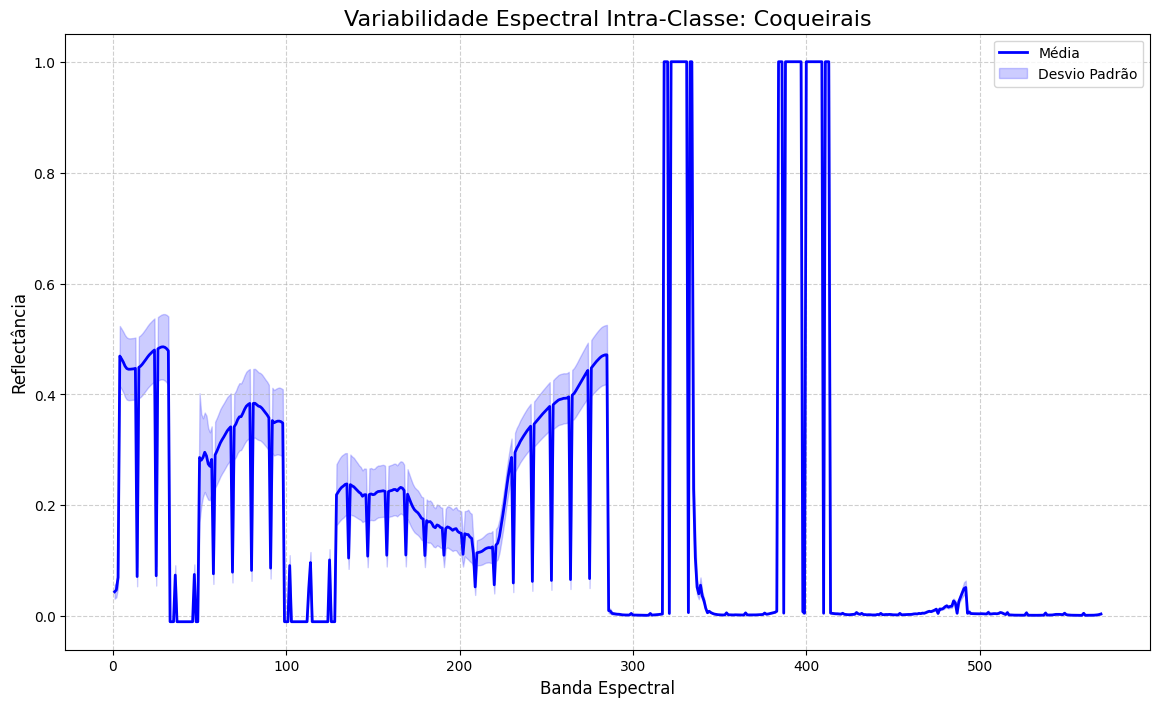

\nEstatísticas Descritivas da Distância SAM para a classe Coqueirais (radianos):
|       |           0 |
|:------|------------:|
| count | 406         |
| mean  |   0.101564  |
| std   |   0.0589431 |
| min   |   0.0120755 |
| 25%   |   0.0602277 |
| 50%   |   0.0883989 |
| 75%   |   0.124552  |
| max   |   0.319244  |


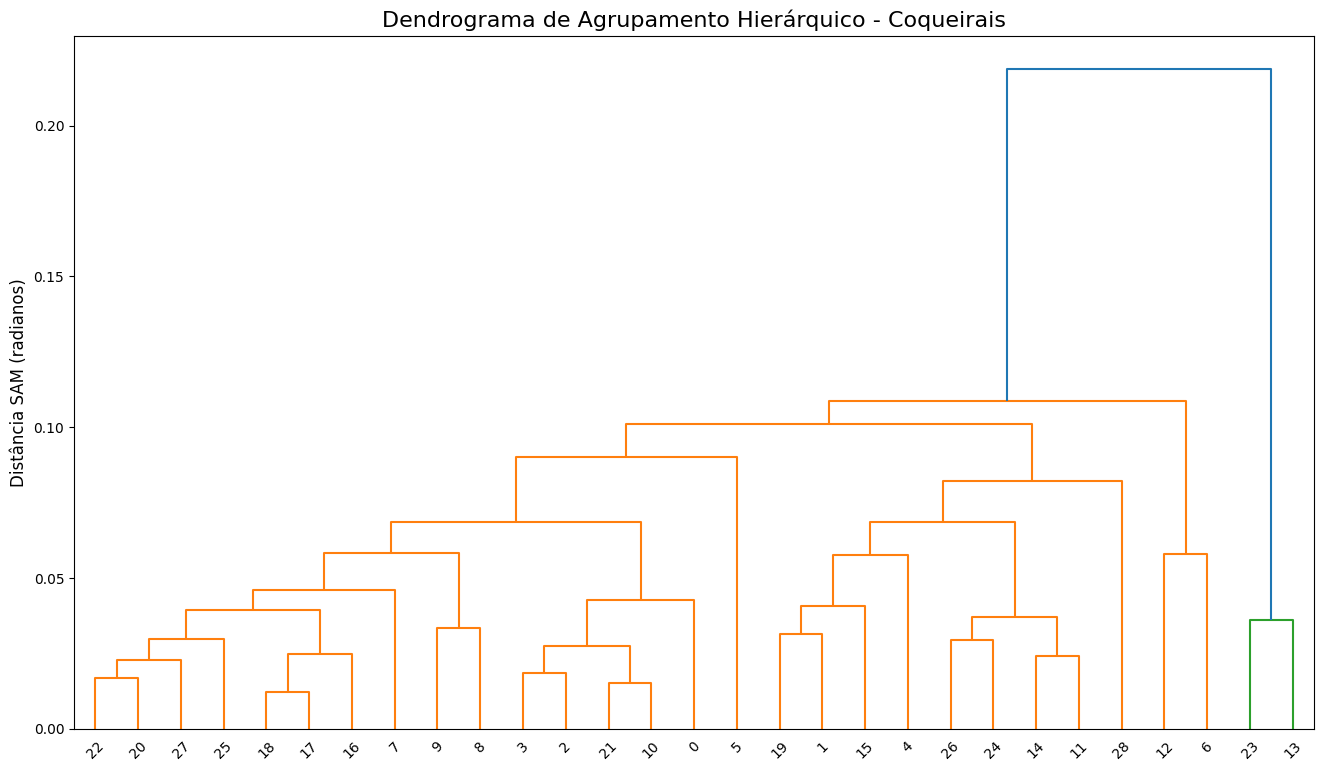

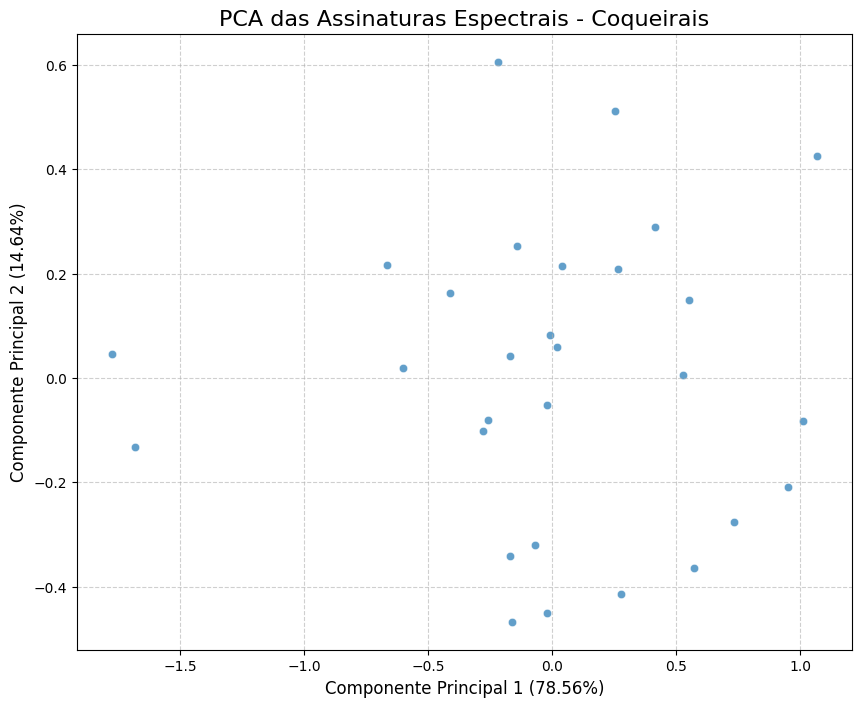

--- Análise para a classe Coqueirais concluída. Resultados salvos em '/content/drive/MyDrive/GEE_Exports_EMIT_Single/resultados_analise_intra_classe'. ---\n================================================================================\n
--- Processando a classe: caatinga ---
Dados carregados. Amostras: 18, Bandas: 570


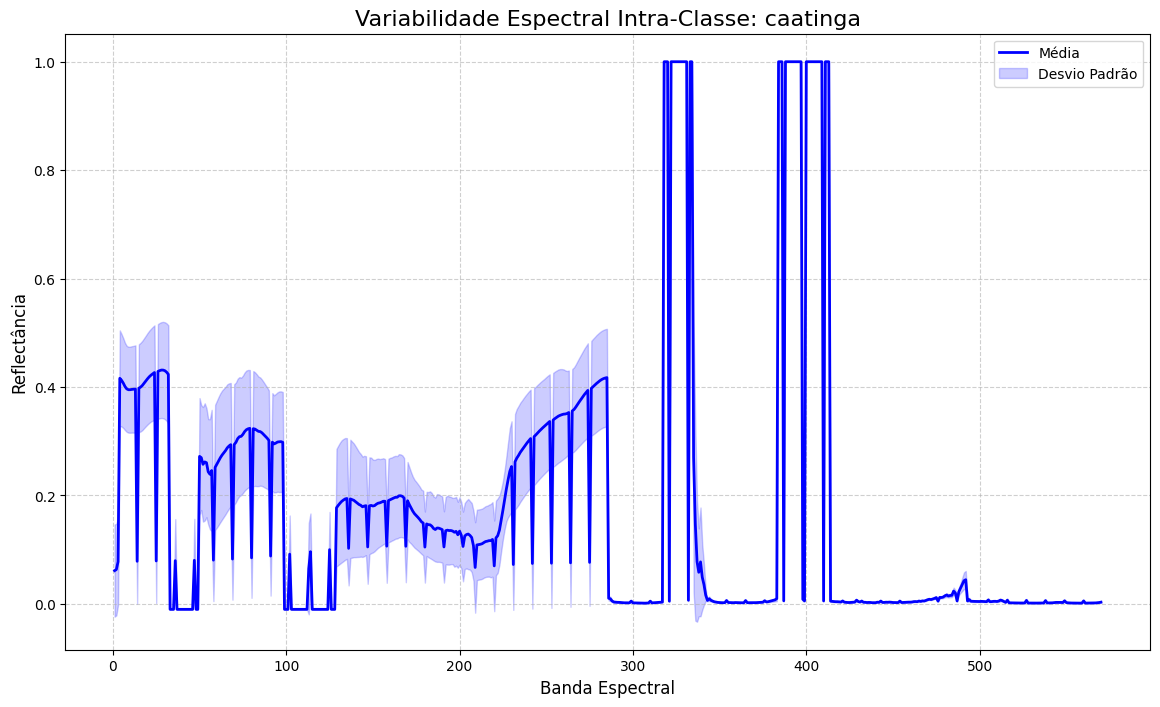

\nEstatísticas Descritivas da Distância SAM para a classe caatinga (radianos):
|       |           0 |
|:------|------------:|
| count | 153         |
| mean  |   0.207941  |
| std   |   0.13969   |
| min   |   0.009725  |
| 25%   |   0.0954172 |
| 50%   |   0.17221   |
| 75%   |   0.303214  |
| max   |   0.560982  |


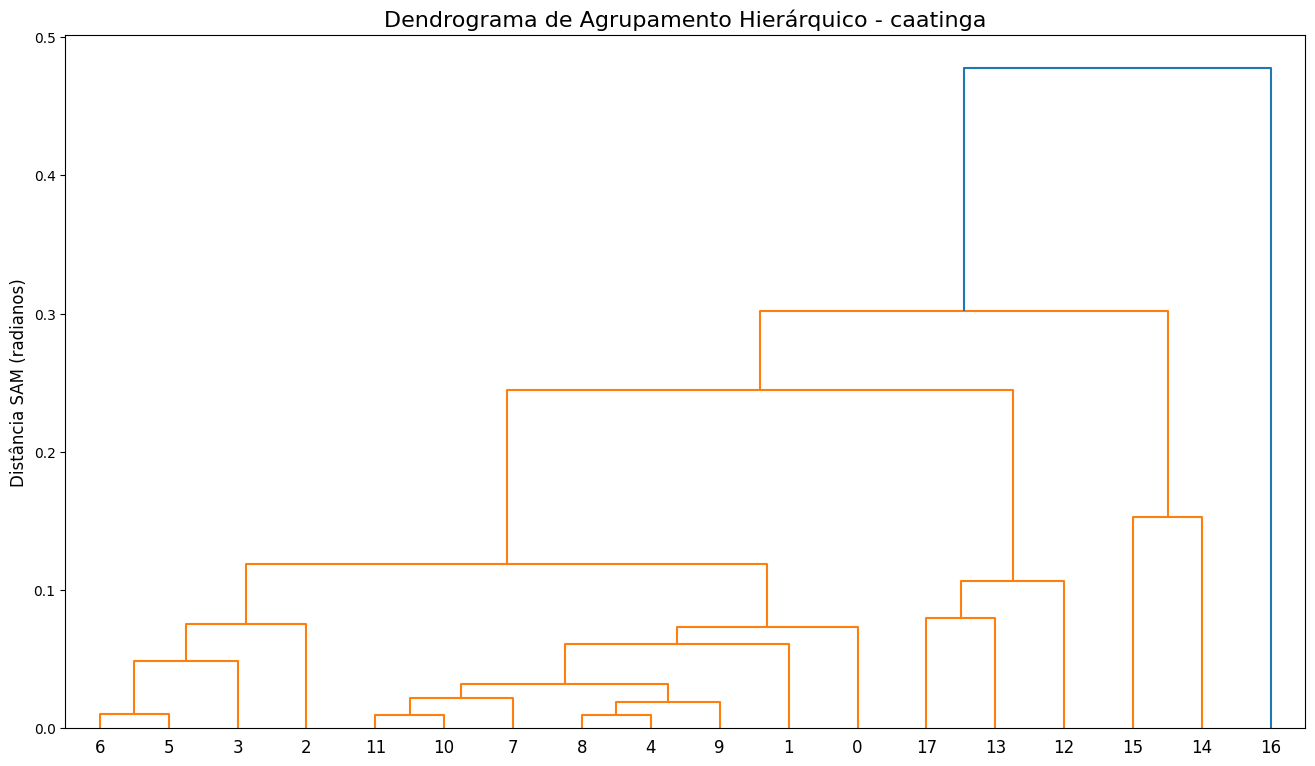

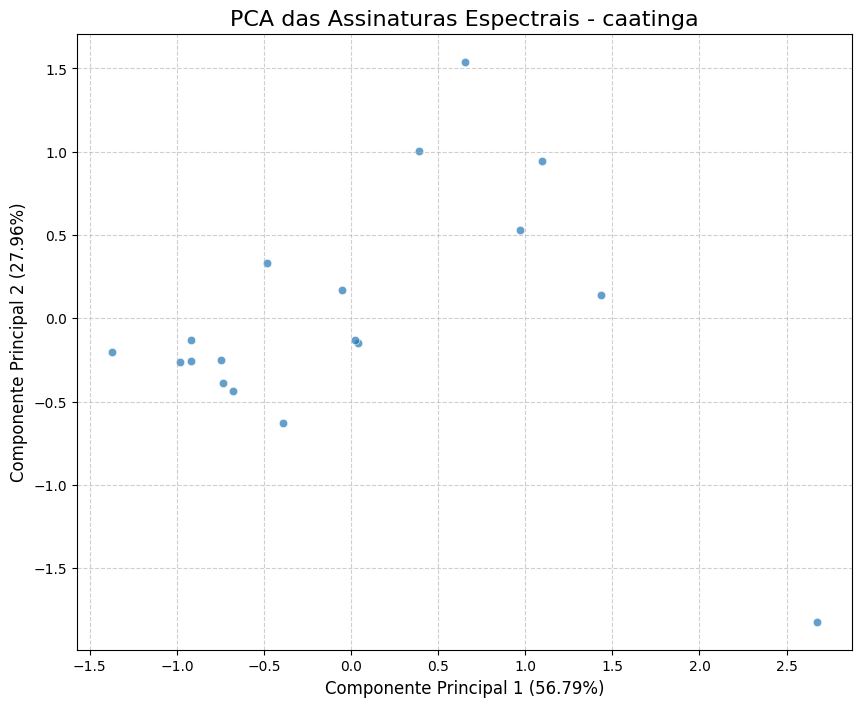

--- Análise para a classe caatinga concluída. Resultados salvos em '/content/drive/MyDrive/GEE_Exports_EMIT_Single/resultados_analise_intra_classe'. ---\n================================================================================\n
--- Processando a classe: Cerrados Interiores ---
Dados carregados. Amostras: 10, Bandas: 570


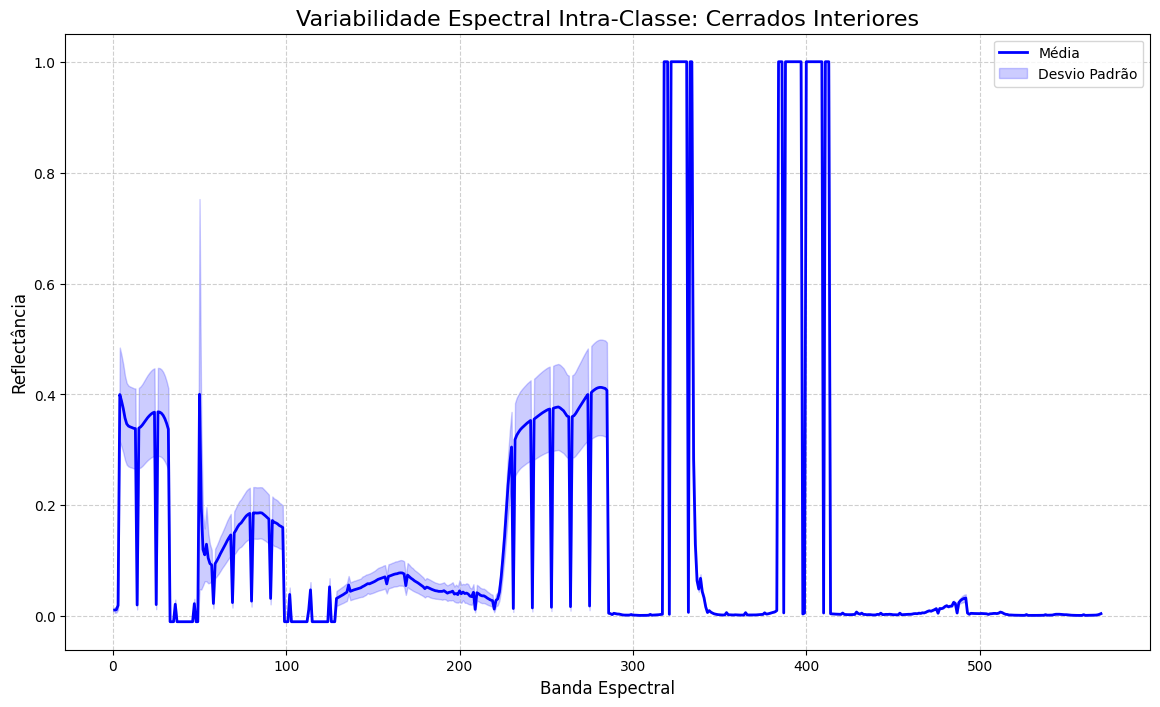

\nEstatísticas Descritivas da Distância SAM para a classe Cerrados Interiores (radianos):
|       |          0 |
|:------|-----------:|
| count | 45         |
| mean  |  0.133359  |
| std   |  0.0735422 |
| min   |  0.0214321 |
| 25%   |  0.0740218 |
| 50%   |  0.11607   |
| 75%   |  0.17111   |
| max   |  0.344167  |


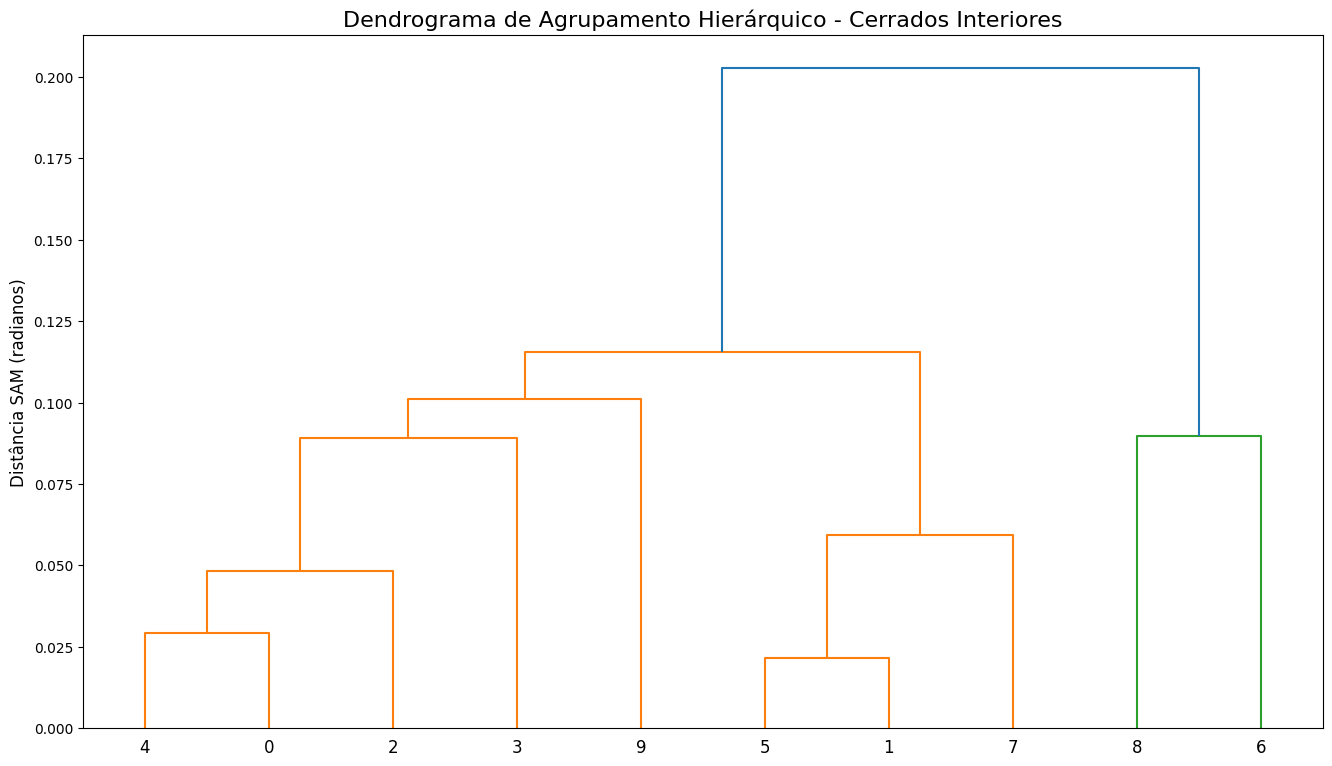

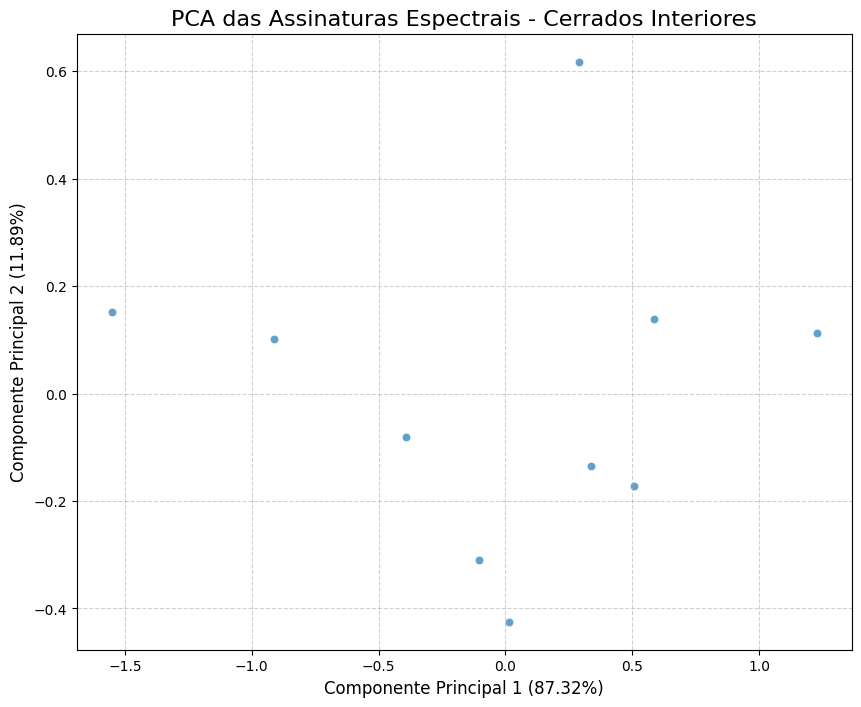

--- Análise para a classe Cerrados Interiores concluída. Resultados salvos em '/content/drive/MyDrive/GEE_Exports_EMIT_Single/resultados_analise_intra_classe'. ---\n================================================================================\n
--- Processando a classe: solo ---
Dados carregados. Amostras: 6, Bandas: 570


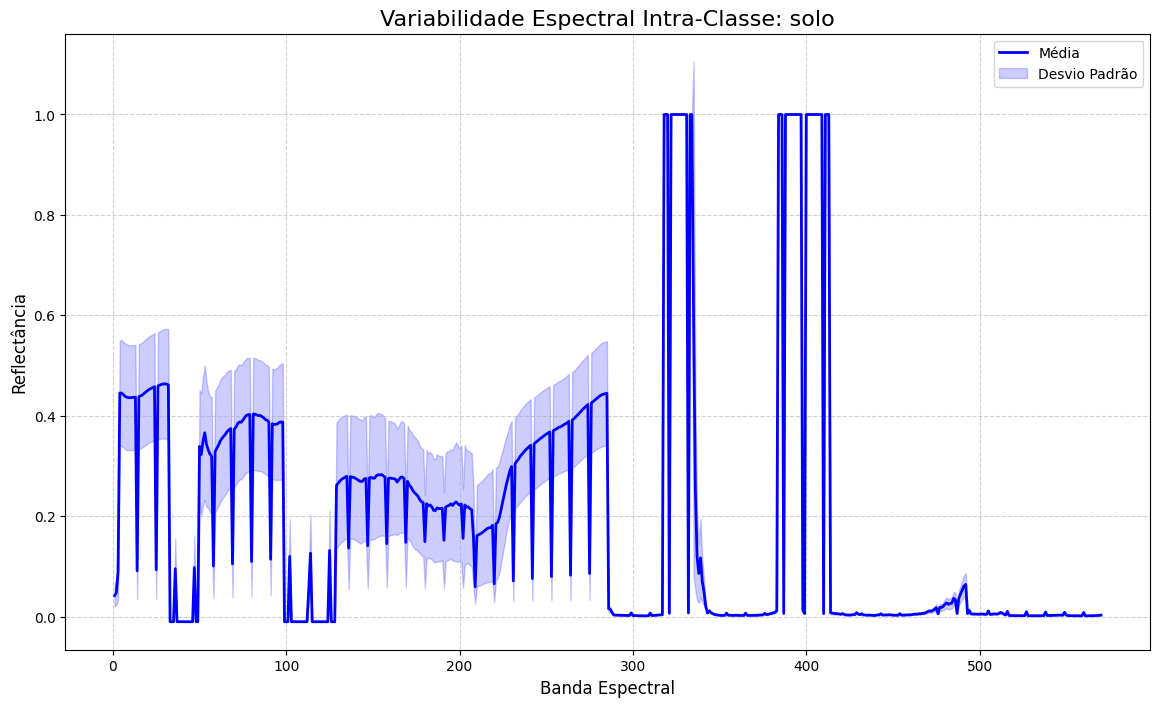

\nEstatísticas Descritivas da Distância SAM para a classe solo (radianos):
|       |          0 |
|:------|-----------:|
| count | 15         |
| mean  |  0.233267  |
| std   |  0.101458  |
| min   |  0.0239041 |
| 25%   |  0.180479  |
| 50%   |  0.248778  |
| 75%   |  0.273393  |
| max   |  0.418651  |


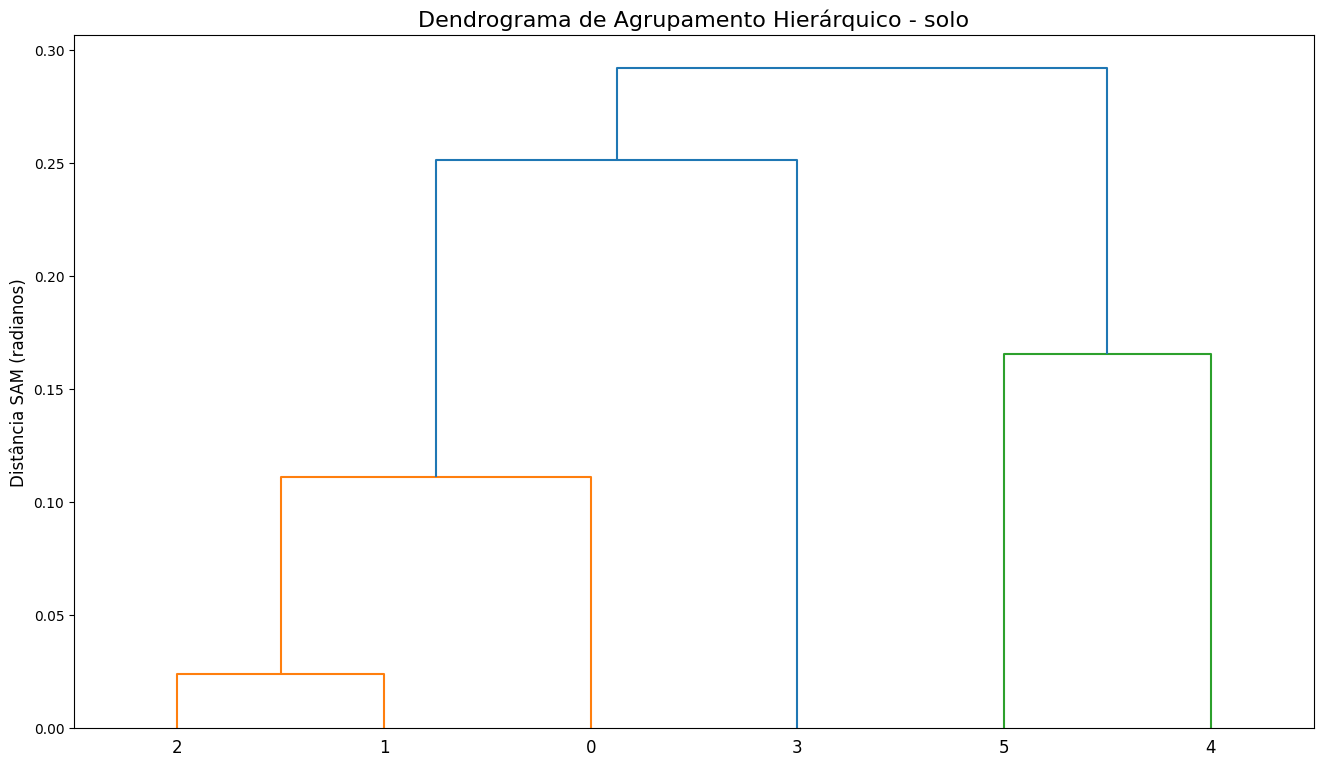

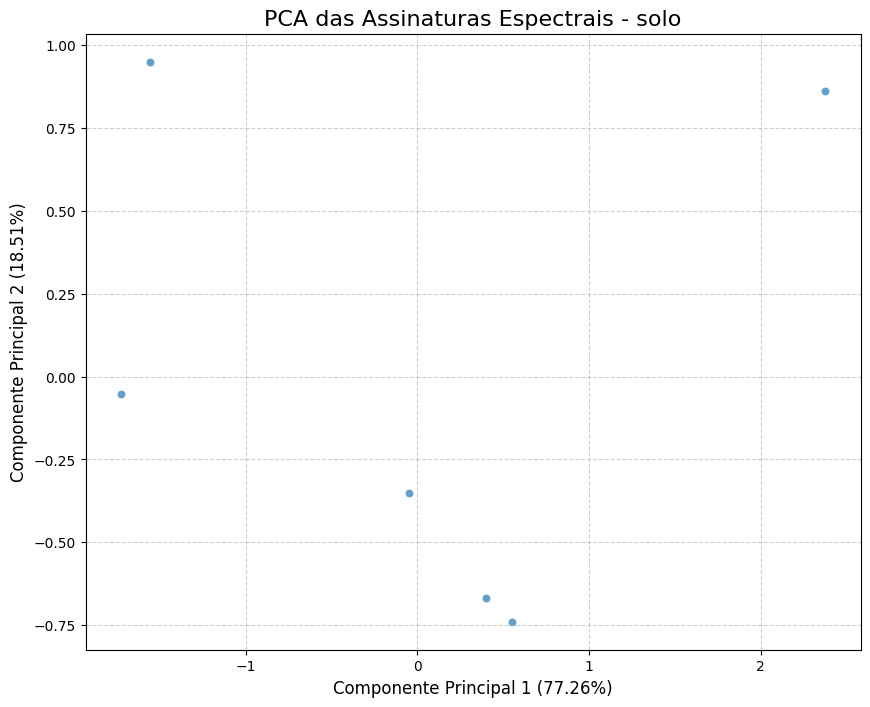

--- Análise para a classe solo concluída. Resultados salvos em '/content/drive/MyDrive/GEE_Exports_EMIT_Single/resultados_analise_intra_classe'. ---\n================================================================================\n
--- Processando a classe: carnaubal (1) ---
Dados carregados. Amostras: 69, Bandas: 570


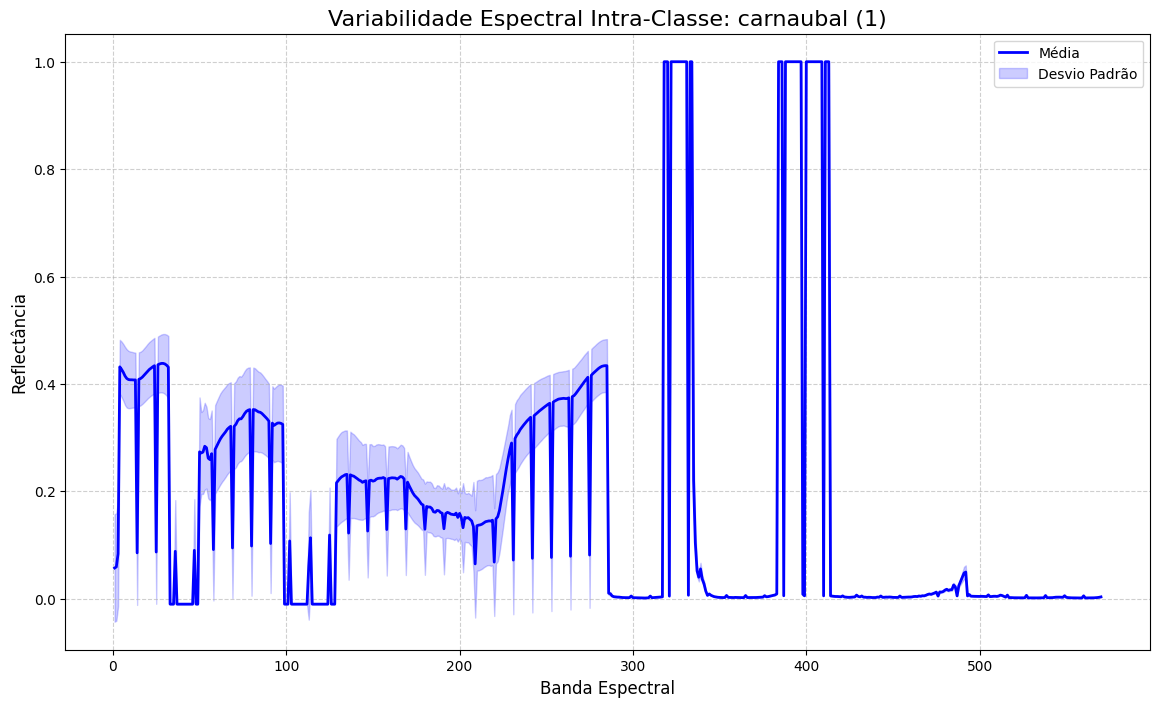

\nEstatísticas Descritivas da Distância SAM para a classe carnaubal (1) (radianos):
|       |             0 |
|:------|--------------:|
| count | 2346          |
| mean  |    0.132123   |
| std   |    0.107288   |
| min   |    0.00443885 |
| 25%   |    0.0608715  |
| 50%   |    0.10311    |
| 75%   |    0.165502   |
| max   |    0.525559   |


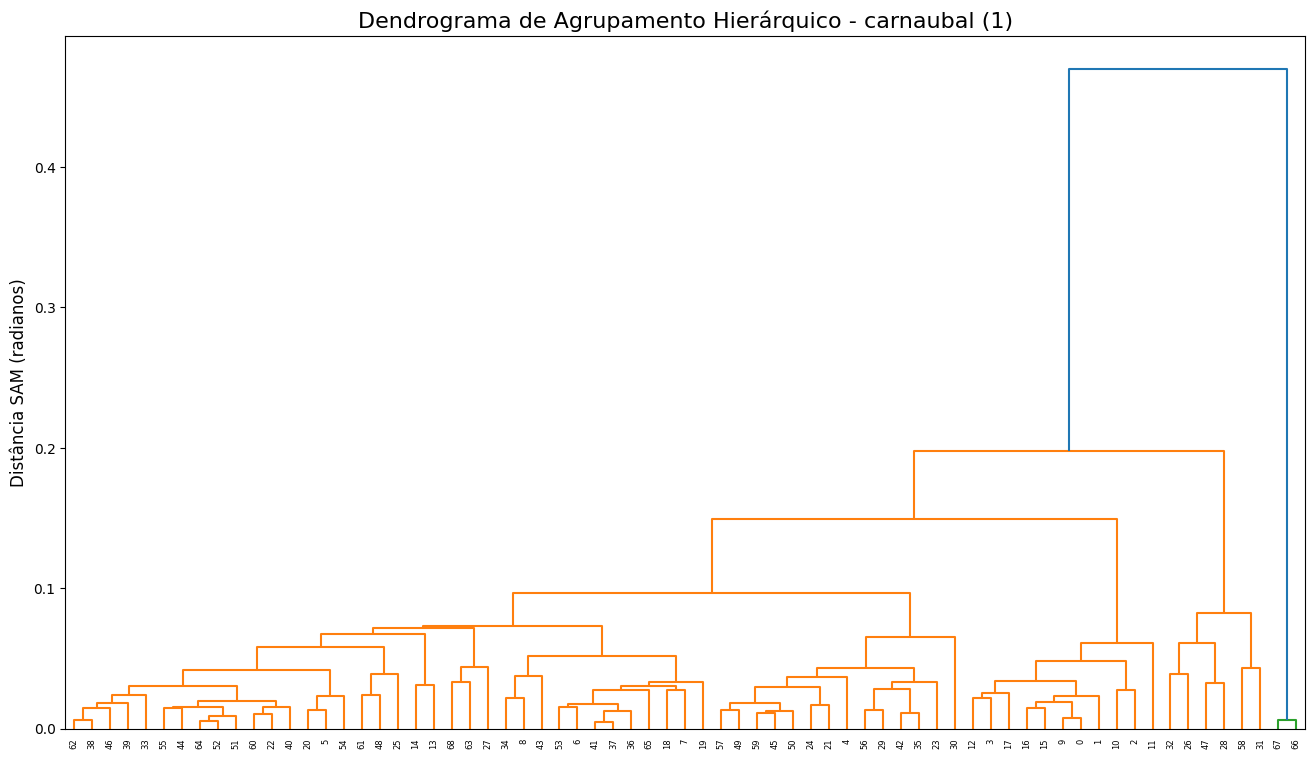

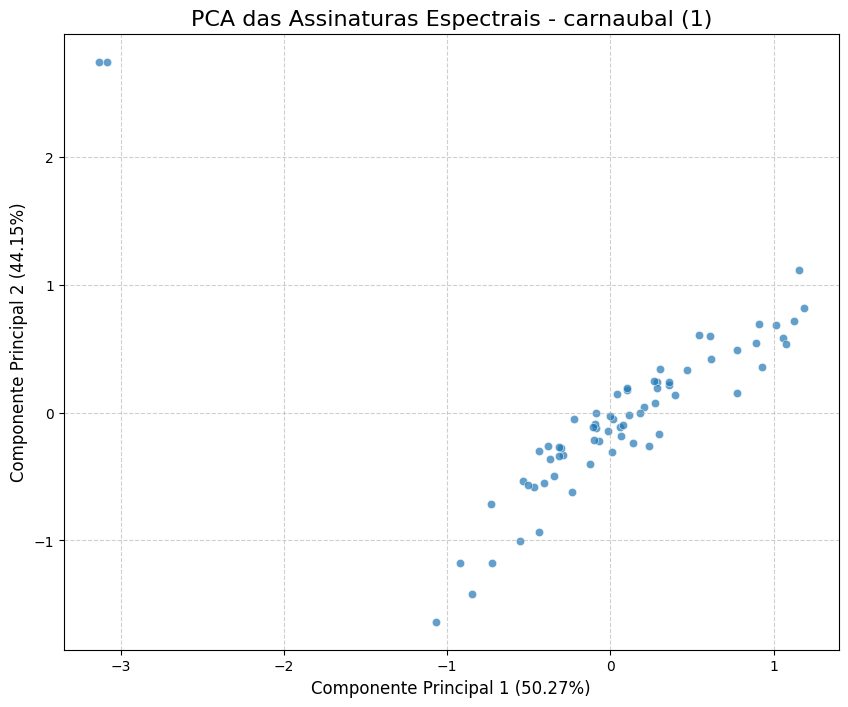

--- Análise para a classe carnaubal (1) concluída. Resultados salvos em '/content/drive/MyDrive/GEE_Exports_EMIT_Single/resultados_analise_intra_classe'. ---\n================================================================================\n
--- Processando a classe: carnaubal ---
Dados carregados. Amostras: 279, Bandas: 570


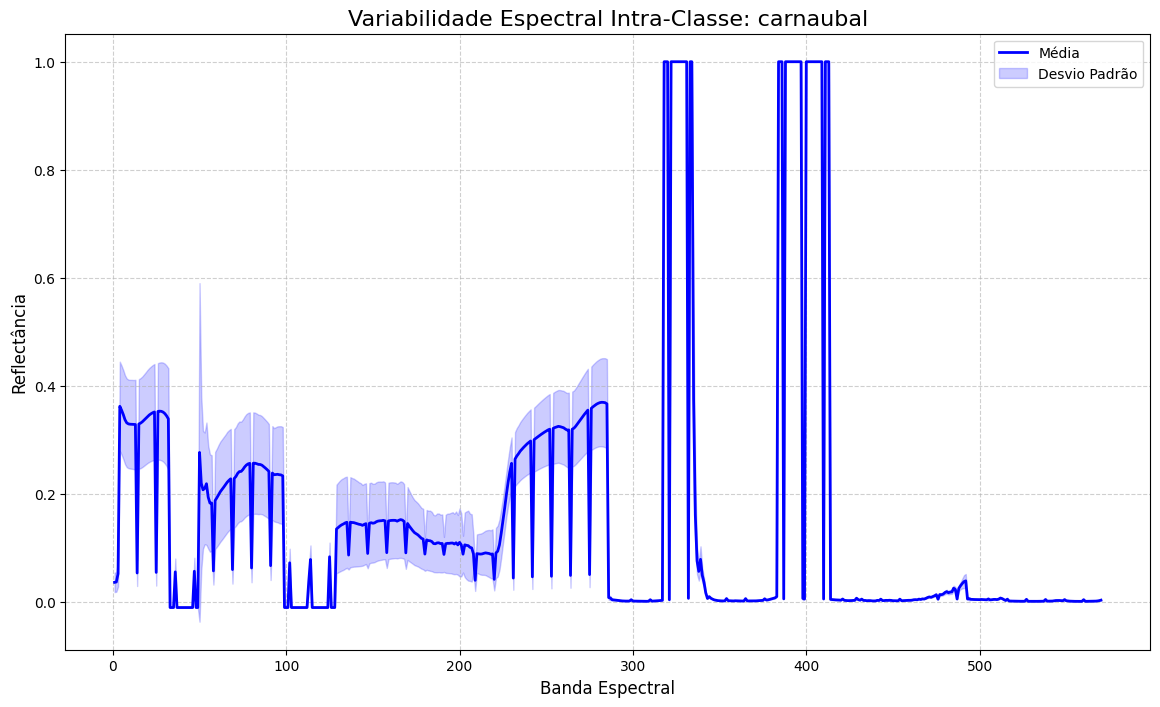

\nEstatísticas Descritivas da Distância SAM para a classe carnaubal (radianos):
|       |             0 |
|:------|--------------:|
| count | 38781         |
| mean  |     0.18065   |
| std   |     0.0987342 |
| min   |     0         |
| 25%   |     0.104342  |
| 50%   |     0.163229  |
| 75%   |     0.239176  |
| max   |     0.639498  |


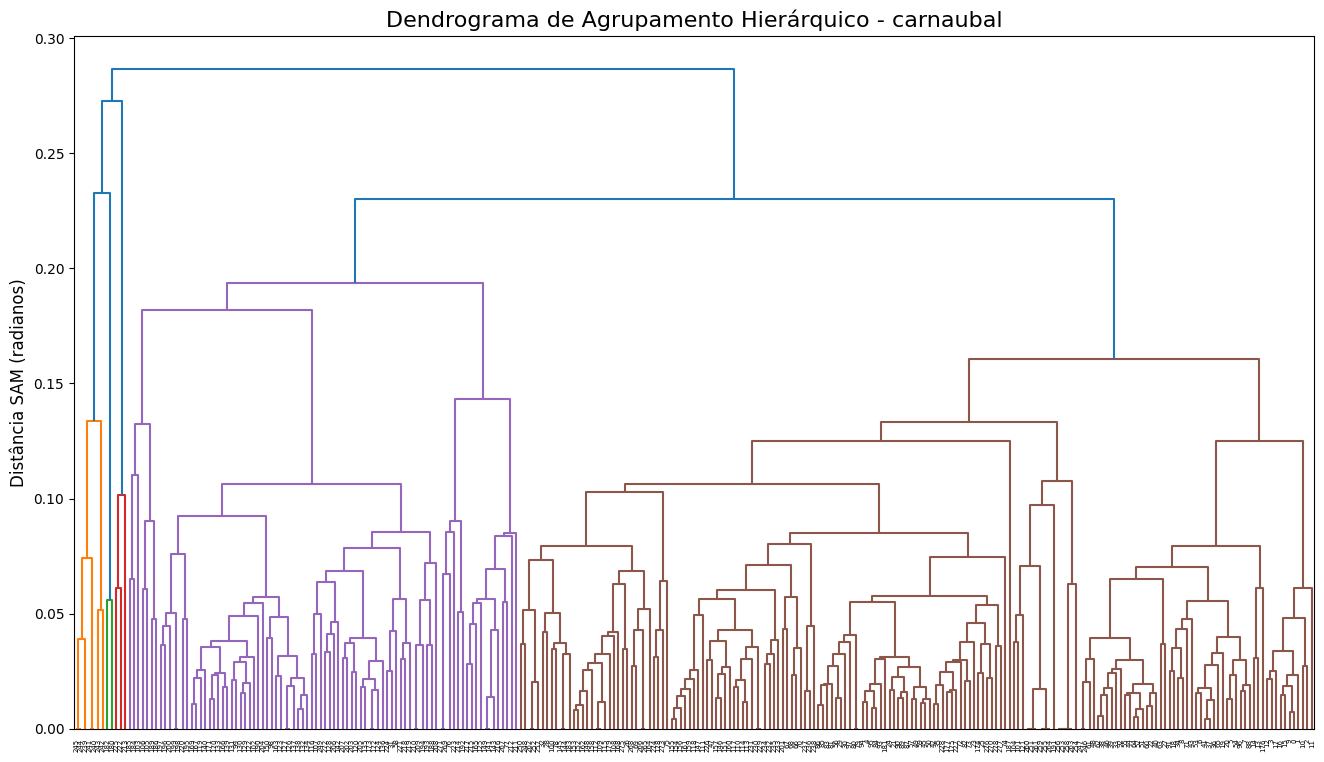

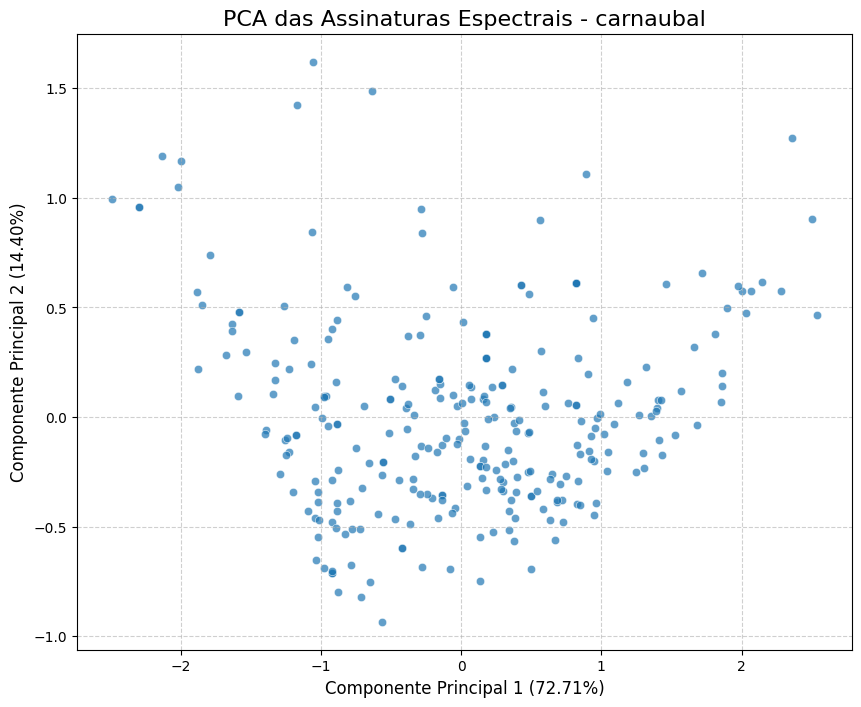

--- Análise para a classe carnaubal concluída. Resultados salvos em '/content/drive/MyDrive/GEE_Exports_EMIT_Single/resultados_analise_intra_classe'. ---\n================================================================================\n


In [ ]:
# intra_class_spectral_analysis_colab_corrigido.ipynb

# ----------------------------------------------------------------------
# CÉLULA 1: CONFIGURAÇÃO DO AMBIENTE
# ----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA
from google.colab import drive

# Montar o Google Drive
drive.mount("/content/drive")

# ----------------------------------------------------------------------
# CÉLULA 2: LÓGICA DE DETECÇÃO DE ARQUIVOS E LOOP DE ANÁLISE
# ----------------------------------------------------------------------

# Caminho para a pasta no Google Drive que contém os arquivos
# Altere 'seu/caminho/aqui' para o caminho correto da sua pasta
# Exemplo: "/content/drive/MyDrive/GEE_Exports_EMIT_Single/"
folder_path = "/content/drive/MyDrive/GEE_Exports_EMIT_Single/"

# Cria uma pasta para salvar os resultados, se não existir
output_folder = os.path.join(folder_path, "resultados_analise_intra_classe")
os.makedirs(output_folder, exist_ok=True)

# Lista todos os arquivos na pasta e filtra aqueles que correspondem ao padrão
all_files = os.listdir(folder_path)
target_files = [f for f in all_files if f.startswith('assinaturas_pontos_') and f.endswith('.csv')]

print(f"Arquivos encontrados para análise: {target_files}\\n")

# Loop principal para analisar cada arquivo encontrado
for filename in target_files:
    # Extrai o nome da classe do nome do arquivo
    # Ex: de "assinaturas_pontos_Caatinga.csv" -> "Caatinga"
    try:
        class_name = filename.replace('assinaturas_pontos_', '').replace('.csv', '')
    except:
        class_name = "Classe_Desconhecida"

    print(f"--- Processando a classe: {class_name} ---")

    # Caminho completo para o arquivo atual
    file_path = os.path.join(folder_path, filename)
    df = pd.read_csv(file_path)

    # Isole as colunas de reflectância
    reflectance_columns = [col for col in df.columns if col.startswith('reflectance_')]
    reflectance_data = df[reflectance_columns]

    if reflectance_data.empty:
        print(f"AVISO: Nenhuma coluna de reflectância encontrada para a classe {class_name}. Pulando para o próximo arquivo.\\n")
        continue

    print(f"Dados carregados. Amostras: {reflectance_data.shape[0]}, Bandas: {reflectance_data.shape[1]}")

    # --- 2. Análise Estatística e Visualização da Variabilidade ---
    mean_signature = reflectance_data.mean(axis=0)
    std_signature = reflectance_data.std(axis=0)
    wavelengths = np.arange(1, reflectance_data.shape[1] + 1)

    plt.figure(figsize=(14, 8))
    plt.plot(wavelengths, mean_signature, color='blue', linewidth=2, label='Média')
    plt.fill_between(wavelengths, mean_signature - std_signature, mean_signature + std_signature, color='blue', alpha=0.2, label='Desvio Padrão')
    plt.title(f'Variabilidade Espectral Intra-Classe: {class_name}', fontsize=16)
    plt.xlabel('Banda Espectral', fontsize=12)
    plt.ylabel('Reflectância', fontsize=12)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.savefig(os.path.join(output_folder, f"variabilidade_{class_name}.png"))
    plt.show()

    # --- 3. Análise de Similaridade e Dispersão ---
    def calculate_sam(s1, s2):
        dot_product = np.dot(s1, s2)
        norm_s1 = np.linalg.norm(s1)
        norm_s2 = np.linalg.norm(s2)
        if norm_s1 == 0 or norm_s2 == 0: return 0.0
        cosine_angle = np.clip(dot_product / (norm_s1 * norm_s2), -1.0, 1.0)
        return np.arccos(cosine_angle)

    sam_distances = pdist(reflectance_data.values, metric=calculate_sam)
    print(f"\\nEstatísticas Descritivas da Distância SAM para a classe {class_name} (radianos):")
    print(pd.Series(sam_distances).describe().to_markdown())

    # --- 4. Análise de Agrupamento (Dendrograma) ---
    if len(sam_distances) > 0:
        linked = linkage(sam_distances, method='average')
        plt.figure(figsize=(16, 9))
        dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
        plt.title(f"Dendrograma de Agrupamento Hierárquico - {class_name}", fontsize=16)
        plt.ylabel("Distância SAM (radianos)", fontsize=12)
        plt.savefig(os.path.join(output_folder, f"dendrograma_{class_name}.png"))
        plt.show()

    # --- 5. Análise de Componentes Principais (PCA) ---
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(reflectance_data)
    pca_df = pd.DataFrame(data=pca_result, columns=["Componente Principal 1", "Componente Principal 2"])

    plt.figure(figsize=(10, 8))
    sns.scatterplot(x="Componente Principal 1", y="Componente Principal 2", data=pca_df, alpha=0.7)
    plt.title(f'PCA das Assinaturas Espectrais - {class_name}', fontsize=16)
    plt.xlabel(f'Componente Principal 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)', fontsize=12)
    plt.ylabel(f'Componente Principal 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.savefig(os.path.join(output_folder, f"pca_{class_name}.png"))
    plt.show()

    print(f"--- Análise para a classe {class_name} concluída. Resultados salvos em '{output_folder}'. ---\\n" + "="*80 + "\\n")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Arquivos de métricas encontrados para análise: ['assinaturas_metricas_Solar.csv', 'assinaturas_metricas_Brejos de Altitude.csv', 'assinaturas_metricas_Culturas de Caju.csv', 'assinaturas_metricas_VegetacaoDegradada.csv', 'assinaturas_metricas_Coqueirais.csv', 'assinaturas_metricas_caatinga.csv', 'assinaturas_metricas_Cerrados Interiores.csv', 'assinaturas_metricas_solo.csv', 'assinaturas_metricas_carnaubal (1).csv', 'assinaturas_metricas_carnaubal.csv']

DataFrame consolidado com as assinaturas espectrais de cada classe:
|   wavelength_nm |     Solar |   Brejos de Altitude |   Culturas de Caju |   VegetacaoDegradada |   Coqueirais |   caatinga |   Cerrados Interiores |      solo |   carnaubal (1) |   carnaubal |
|----------------:|----------:|---------------------:|-------------------:|---------------------:|-------------:|-----------:|----------------------:

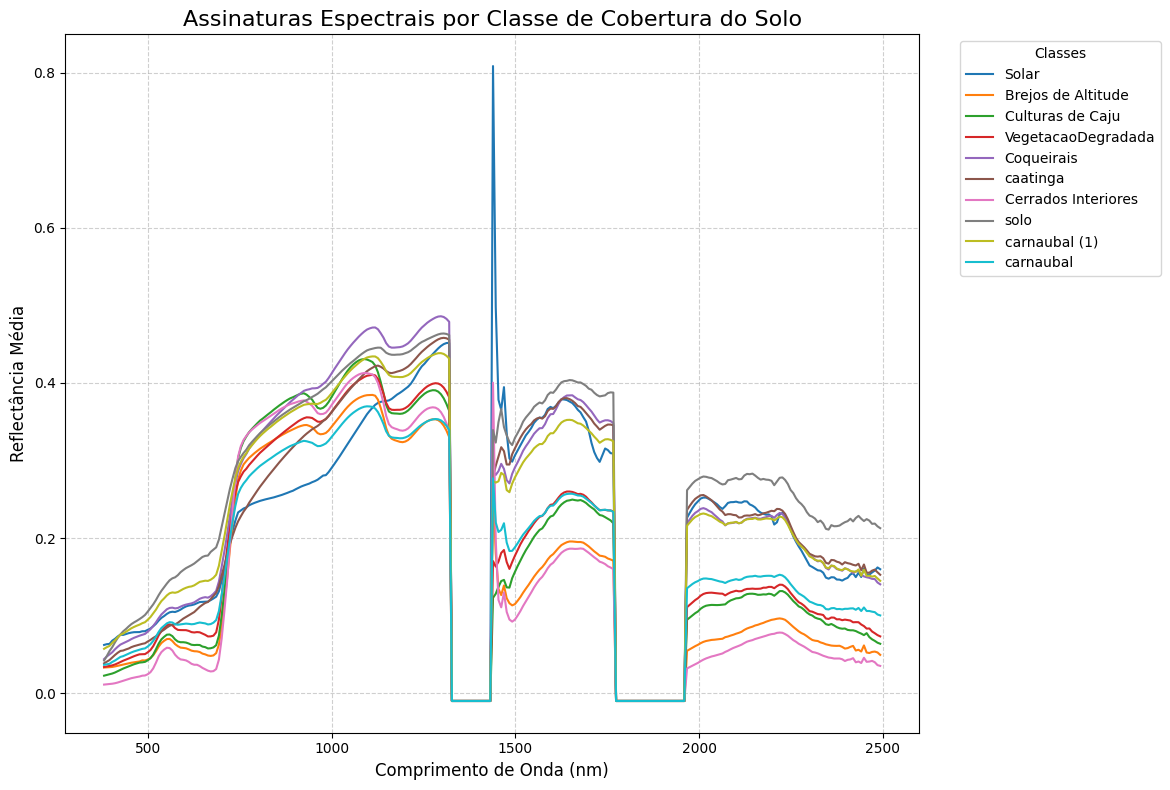


Matriz de Distância Euclidiana:
|                     |    Solar |   Brejos de Altitude |   Culturas de Caju |   VegetacaoDegradada |   Coqueirais |   caatinga |   Cerrados Interiores |     solo |   carnaubal (1) |   carnaubal |
|:--------------------|---------:|---------------------:|-------------------:|---------------------:|-------------:|-----------:|----------------------:|---------:|----------------:|------------:|
| Solar               | 0        |             1.89214  |           1.67666  |             1.4399   |     1.03967  |   0.734614 |              2.0685   | 1.07426  |        0.933048 |    1.26582  |
| Brejos de Altitude  | 1.89214  |             0        |           0.573724 |             0.632638 |     1.80629  |   1.79188  |              0.343617 | 2.25422  |        1.63581  |    0.712556 |
| Culturas de Caju    | 1.67666  |             0.573724 |           0        |             0.293314 |     1.3326   |   1.40415  |              0.684508 | 1.81499  |        1.19859

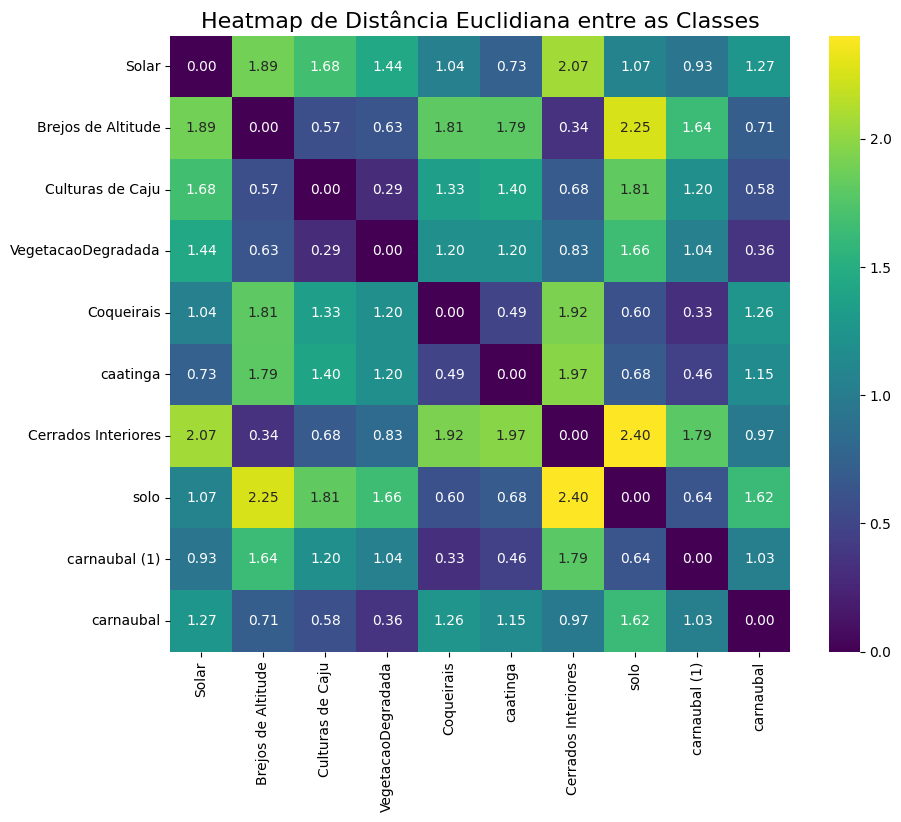

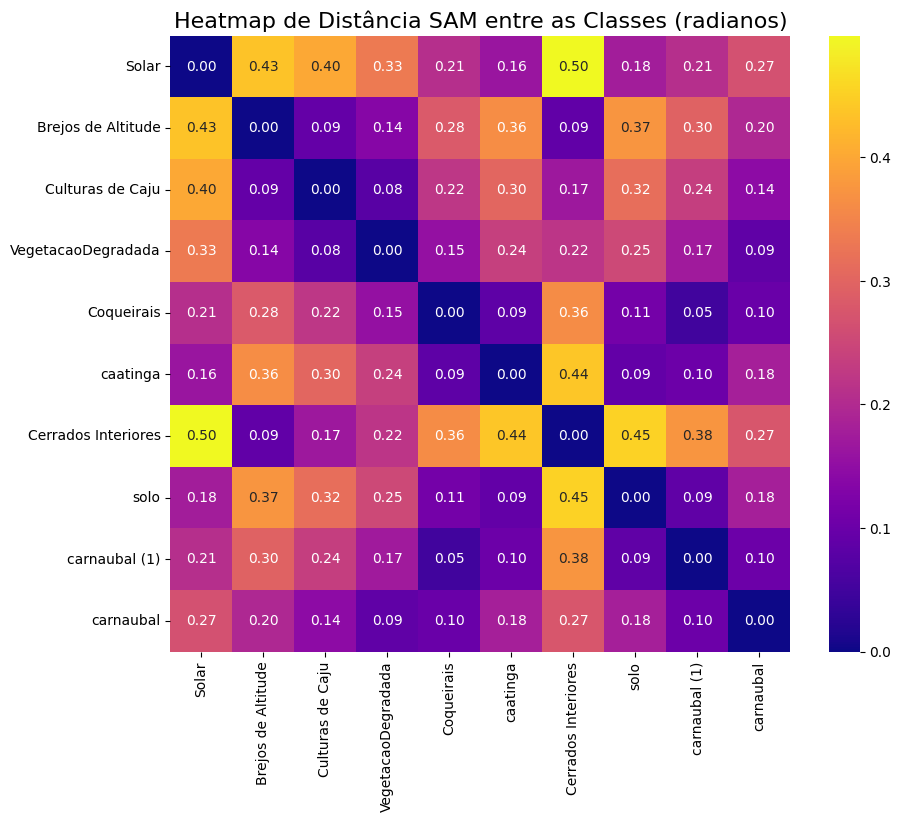

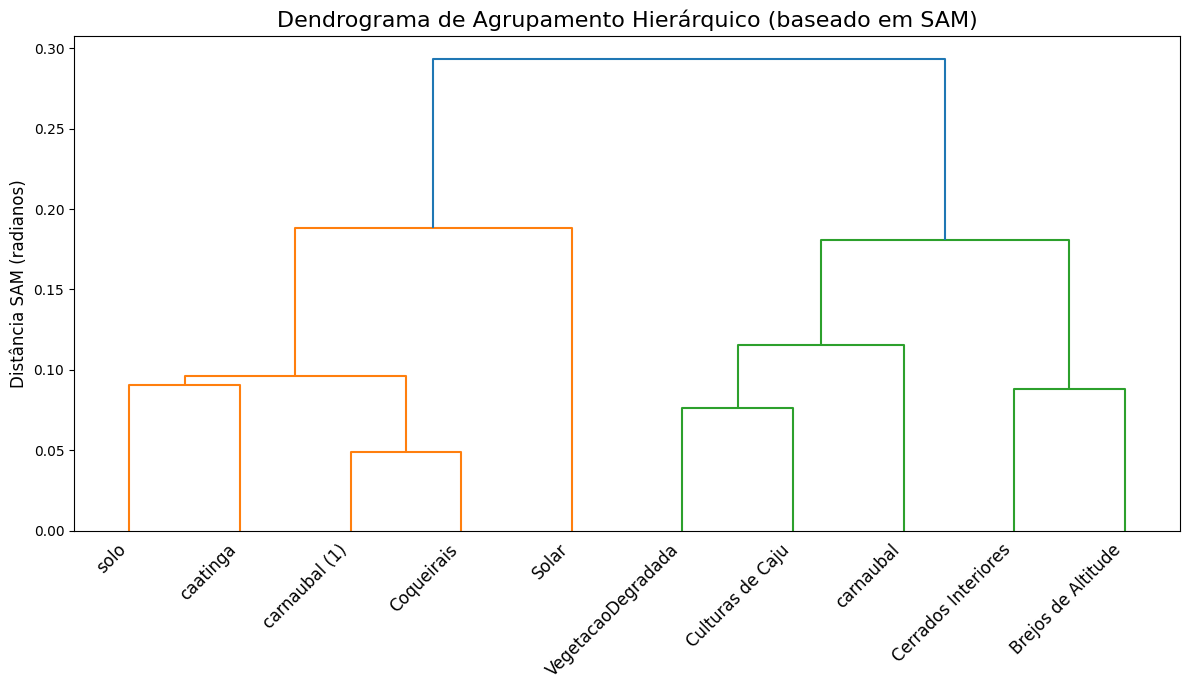

In [ ]:
# inter_class_spectral_analysis_corrigido.ipynb

# ----------------------------------------------------------------------
# CÉLULA 1: CONFIGURAÇÃO DO AMBIENTE
# ----------------------------------------------------------------------
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

# Montar o Google Drive
from google.colab import drive
drive.mount("/content/drive")

# ----------------------------------------------------------------------
# CÉLULA 2: CARREGAMENTO E CONSOLIDAÇÃO DOS DADOS DE MÉTRICAS
# ----------------------------------------------------------------------

# Caminho para a pasta que contém os arquivos CSV
# Altere para o caminho correto da sua pasta
folder_path = "/content/drive/MyDrive/GEE_Exports_EMIT_Single/"

# Lista todos os arquivos na pasta e filtra apenas os de MÉTRICAS
all_files = os.listdir(folder_path)
target_files = [f for f in all_files if f.startswith('assinaturas_metricas_') and f.endswith('.csv')]

print(f"Arquivos de métricas encontrados para análise: {target_files}\n")

# Dicionário para armazenar as assinaturas de cada classe
signatures = {}

for filename in target_files:
    # Extrai o nome da classe do nome do arquivo
    try:
        class_name = filename.replace('assinaturas_metricas_', '').replace('.csv', '')
    except:
        class_name = os.path.splitext(filename)[0]

    file_path = os.path.join(folder_path, filename)
    df_temp = pd.read_csv(file_path)

    # Armazena a assinatura (coluna 'media') com o comprimento de onda como índice
    # Isso garante que todas as assinaturas estejam alinhadas corretamente
    signatures[class_name] = pd.Series(df_temp['media'].values, index=df_temp['wavelength_nm'])

# Consolida todas as assinaturas em um único DataFrame
df_signatures = pd.DataFrame(signatures)
df_signatures.sort_index(inplace=True) # Garante a ordem dos comprimentos de onda

print("DataFrame consolidado com as assinaturas espectrais de cada classe:")
print(df_signatures.head().to_markdown())

# ----------------------------------------------------------------------
# CÉLULA 3: VISUALIZAÇÃO DAS ASSINATURAS ESPECTRAIS
# ----------------------------------------------------------------------
plt.figure(figsize=(14, 8))
for class_name in df_signatures.columns:
    plt.plot(df_signatures.index, df_signatures[class_name], label=class_name)

plt.title('Assinaturas Espectrais por Classe de Cobertura do Solo', fontsize=16)
plt.xlabel('Comprimento de Onda (nm)', fontsize=12)
plt.ylabel('Reflectância Média', fontsize=12)
plt.legend(title='Classes', bbox_to_anchor=(1.04, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajusta o layout para a legenda não cortar
plt.show()

# ----------------------------------------------------------------------
# CÉLULA 4: CÁLCULO DAS DISTÂNCIAS ESPECTRAIS
# ----------------------------------------------------------------------
# Transpõe o DataFrame para que as classes fiquem nas linhas, facilitando o cálculo
data_for_distance = df_signatures.T

# a. Distância Euclidiana
euclidean_distances = pdist(data_for_distance.values, metric='euclidean')
df_euclidean = pd.DataFrame(squareform(euclidean_distances), index=data_for_distance.index, columns=data_for_distance.index)

# b. Spectral Angle Mapper (SAM)
def calculate_sam(s1, s2):
    dot_product = np.dot(s1, s2)
    norm_s1 = np.linalg.norm(s1)
    norm_s2 = np.linalg.norm(s2)
    if norm_s1 == 0 or norm_s2 == 0: return 0.0
    cosine_angle = np.clip(dot_product / (norm_s1 * norm_s2), -1.0, 1.0)
    return np.arccos(cosine_angle)

sam_distances = pdist(data_for_distance.values, metric=calculate_sam)
df_sam = pd.DataFrame(squareform(sam_distances), index=data_for_distance.index, columns=data_for_distance.index)

print("\nMatriz de Distância Euclidiana:")
print(df_euclidean.to_markdown())
print("\nMatriz de Distância SAM (em radianos):")
print(df_sam.to_markdown())

# ----------------------------------------------------------------------
# CÉLULA 5: VISUALIZAÇÃO DAS MATRIZES DE DISTÂNCIA (HEATMAPS)
# ----------------------------------------------------------------------
# Heatmap para Distância Euclidiana
plt.figure(figsize=(10, 8))
sns.heatmap(df_euclidean, annot=True, cmap='viridis', fmt='.2f')
plt.title('Heatmap de Distância Euclidiana entre as Classes', fontsize=16)
plt.show()

# Heatmap para Distância SAM
plt.figure(figsize=(10, 8))
sns.heatmap(df_sam, annot=True, cmap='plasma', fmt='.2f')
plt.title('Heatmap de Distância SAM entre as Classes (radianos)', fontsize=16)
plt.show()

# ----------------------------------------------------------------------
# CÉLULA 6: ANÁLISE DE AGRUPAMENTO HIERÁRQUICO
# ----------------------------------------------------------------------
# Usa a matriz de distância SAM para o agrupamento
linked = linkage(sam_distances, method='average')

plt.figure(figsize=(12, 7))
dendrogram(linked,
           orientation='top',
           labels=data_for_distance.index.to_list(),
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Dendrograma de Agrupamento Hierárquico (baseado em SAM)', fontsize=16)
plt.ylabel('Distância SAM (radianos)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()